In [1]:
# read csv 
import numpy as np
import pandas as pd
import io
import csv
import matplotlib.pyplot as plt

# data processing

In [2]:
# import all data from 2021 
data_path = "data21_2.csv"
vaers_data = pd.read_csv(data_path)
print(vaers_data.keys()[34])

############# symptom dictionary ###################

# get all symptoms and make dictionary
symptom_list = []
symptom_list.extend(vaers_data[vaers_data.keys()[34]].to_list())
symptom_list.extend(vaers_data[vaers_data.keys()[36]].to_list())
symptom_list.extend(vaers_data[vaers_data.keys()[38]].to_list())
symptom_list.extend(vaers_data[vaers_data.keys()[40]].to_list())
symptom_list.extend(vaers_data[vaers_data.keys()[42]].to_list())
# unique sympton list
u_symptom_list = list(set(symptom_list))
print(len(u_symptom_list))
u_symptom_list = [x for x in u_symptom_list if x == x]
print(len(u_symptom_list))
# symptom dictionary
symptom_dict = {u_symptom_list[i]: i for i in range(len(u_symptom_list))}
print(symptom_dict)
num_symptom = len(u_symptom_list)

pagerank_dict = sorted(symptom_dict.items(), key=lambda x: x[1], reverse=False)

/Users/yuanfangxu/.conda/envs/CSIT-DM-Project/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (6,11,14,19,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


SYMPTOM1
6725
6724
{'Peritoneal fluid analysis abnormal': 0, 'HLA marker study': 1, 'Coagulation test': 2, 'Trigeminal nerve paresis': 3, 'Tinnitus': 4, 'Brain death': 5, 'Hypoacusis': 6, 'Serum ferritin normal': 7, 'Sputum abnormal': 8, 'Adenovirus test': 9, 'Breast enlargement': 10, 'Genital blister': 11, 'Vulval abscess': 12, 'Hyperreflexia': 13, 'Abnormal faeces': 14, 'Onychalgia': 15, 'Low density lipoprotein increased': 16, 'Extubation': 17, 'Biopsy liver': 18, 'Bacterial vaginosis': 19, 'Papilloedema': 20, 'Factor VIII deficiency': 21, 'Glossopharyngeal neuralgia': 22, 'Escherichia infection': 23, 'Fractional exhaled nitric oxide abnormal': 24, 'Breast swelling': 25, 'Rhesus antibodies': 26, 'Ultrasound kidney abnormal': 27, 'Eye ulcer': 28, 'Hyperglycaemic hyperosmolar nonketotic syndrome': 29, 'Fluid imbalance': 30, 'Inguinal hernia repair': 31, 'Critical illness': 32, 'Appendiceal abscess': 33, 'Heart rate normal': 34, 'Biopsy thyroid gland abnormal': 35, 'Immunohistochemistr

6725个病症
245908个数据
6725种病，6725个维度

In [4]:
#get vaers_id
Vaers_id = vaers_data[vaers_data.keys()[0]].to_list()
unique_id = list(set(Vaers_id))

# get days in hospitcal
Vaers_hostday = vaers_data[vaers_data.keys()[13]].to_list()
print(vaers_data.keys()[13])
# get symptom status
Vaers_symptom_1 = vaers_data[vaers_data.keys()[34]].to_list()
Vaers_symptom_2 = vaers_data[vaers_data.keys()[36]].to_list()
Vaers_symptom_3 = vaers_data[vaers_data.keys()[38]].to_list()
Vaers_symptom_4 = vaers_data[vaers_data.keys()[40]].to_list()
Vaers_symptom_5 = vaers_data[vaers_data.keys()[42]].to_list()


# list of hospitalized days
hospitalized_status = []
# list of symptom index for each patient - according to symptom dictionary
symptom_status = []
for i in range(len(Vaers_id)):
  if Vaers_id[i] == Vaers_id[i - 1]: continue
  print(i)
  # get id
  temp_id = Vaers_id[i]
  # find index of Vaers_id that gives the same id
  ind_id = []
  for j in range(10):
    if i + j >= len(Vaers_id): break
    if Vaers_id[i+j] == temp_id:
      w = i+j
      ind_id.append(w)

  # find symptom
  t_symptom = []
  # hospital days
  hospital_day = 0
  for j in range(len(ind_id)):
    # symptoms
    t_symptom.append(Vaers_symptom_1[ind_id[j]])
    t_symptom.append(Vaers_symptom_2[ind_id[j]])
    t_symptom.append(Vaers_symptom_3[ind_id[j]])
    t_symptom.append(Vaers_symptom_4[ind_id[j]])
    t_symptom.append(Vaers_symptom_5[ind_id[j]])
    t_symptom = [x for x in t_symptom if x == x]
    # days in hospital
    t_hostday = Vaers_hostday[ind_id[j]]
    if t_hostday == 'nan':
      hospital_day = max(hospital_day ,0)
    else:
      hospital_day = max(hospital_day ,t_hostday)
  # number of days hospitalized
  hospitalized_status.append(hospital_day)
  # symptom list
  unique_symptom = list(set(t_symptom))
  symptom_idx = np.zeros([len(unique_symptom), ])
  for k in range(len(unique_symptom)):
    symptom_idx[k] = symptom_dict.get(unique_symptom[k])
  symptom_status.append(symptom_idx)

HOSPDAYS
0
1
2
3
4
5
6
7
8
9
10
15
16
17
18
19
20
21
22
24
25
27
28
29
31
32
33
34
35
36
38
39
40
41
43
44
45
46
47
48
50
51
52
53
54
56
57
59
60
61
63
64
65
67
68
70
71
72
73
74
75
76
78
79
82
84
86
87
89
90
91
92
93
94
95
97
98
100
101
103
104
106
107
108
109
110
111
113
115
116
117
118
119
121
122
123
124
125
126
127
130
131
133
135
136
137
139
140
141
143
144
146
147
148
149
150
151
153
154
156
158
159
160
161
162
163
164
165
167
168
169
170
172
173
174
175
177
178
179
180
181
182
183
185
186
187
191
193
195
197
199
200
202
204
205
206
207
208
209
210
211
212
216
217
218
220
221
222
223
224
225
228
230
231
232
234
237
238
239
241
243
244
246
247
248
250
252
254
256
258
259
260
262
264
266
267
268
269
270
271
272
273
274
275
276
277
279
281
282
283
285
286
287
290
291
294
296
302
304
307
309
310
311
312
313
314
316
317
320
321
323
324
325
327
328
329
331
332
333
334
335
336
337
339
340
343
344
345
346
347
348
349
350
351
352
353
354
355
356
358
359
360
361
362
364
367
368
369
370
37

3351
3352
3354
3355
3357
3359
3360
3361
3363
3364
3365
3366
3367
3369
3370
3371
3372
3374
3375
3376
3377
3378
3379
3380
3381
3382
3384
3385
3387
3388
3389
3391
3392
3394
3396
3401
3402
3403
3405
3406
3408
3411
3412
3413
3415
3416
3417
3419
3420
3422
3423
3424
3425
3426
3427
3428
3429
3431
3432
3433
3434
3436
3437
3438
3439
3440
3441
3442
3443
3444
3445
3446
3447
3449
3450
3451
3452
3453
3454
3455
3456
3467
3468
3469
3470
3471
3472
3473
3475
3476
3477
3479
3480
3483
3484
3485
3486
3487
3489
3490
3492
3495
3497
3498
3500
3501
3503
3504
3505
3506
3507
3508
3509
3510
3512
3513
3515
3516
3517
3518
3520
3523
3526
3527
3528
3530
3531
3532
3533
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3547
3548
3549
3551
3552
3553
3554
3555
3556
3557
3559
3560
3562
3563
3564
3565
3566
3567
3568
3569
3572
3574
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3587
3589
3590
3592
3594
3596
3598
3599
3601
3603
3604
3605
3607
3608
3610
3611
3612
3614
3615
3616
3617
3618
3620
3621
3622
3623
3624
3625


6281
6283
6284
6285
6286
6287
6288
6290
6292
6293
6294
6297
6301
6302
6303
6304
6305
6306
6307
6309
6310
6311
6312
6313
6314
6316
6317
6318
6319
6320
6321
6322
6323
6324
6325
6326
6327
6328
6329
6330
6331
6332
6333
6334
6335
6336
6338
6339
6340
6341
6343
6344
6346
6347
6348
6349
6350
6351
6352
6354
6355
6357
6359
6360
6362
6364
6365
6366
6367
6368
6370
6371
6372
6373
6374
6375
6377
6378
6379
6380
6381
6382
6383
6384
6385
6387
6390
6391
6392
6393
6394
6395
6397
6399
6400
6402
6404
6405
6406
6407
6408
6409
6410
6411
6412
6413
6414
6415
6417
6421
6423
6424
6425
6427
6428
6429
6432
6433
6434
6435
6436
6438
6439
6440
6442
6443
6444
6445
6446
6447
6448
6451
6453
6454
6456
6457
6459
6460
6461
6463
6464
6465
6466
6468
6470
6472
6474
6475
6476
6478
6479
6481
6482
6483
6484
6485
6486
6487
6488
6489
6490
6491
6493
6494
6495
6496
6498
6499
6500
6501
6503
6504
6506
6510
6511
6512
6513
6515
6516
6517
6518
6520
6522
6523
6525
6527
6528
6530
6532
6534
6535
6536
6537
6539
6540
6541
6542
6543
6544
6546


9266
9267
9268
9270
9271
9272
9273
9274
9275
9276
9277
9278
9279
9281
9282
9283
9284
9285
9286
9287
9289
9290
9291
9292
9293
9294
9295
9297
9298
9299
9300
9301
9302
9303
9304
9305
9306
9307
9309
9311
9312
9313
9314
9315
9316
9317
9318
9319
9320
9321
9323
9324
9325
9326
9327
9328
9329
9330
9332
9333
9334
9335
9337
9340
9341
9342
9343
9344
9345
9346
9348
9349
9350
9351
9352
9353
9354
9355
9357
9359
9360
9361
9363
9364
9365
9366
9368
9369
9371
9373
9375
9376
9378
9379
9381
9383
9384
9386
9387
9389
9390
9391
9392
9394
9395
9396
9398
9399
9400
9401
9402
9403
9404
9405
9406
9407
9408
9409
9410
9412
9413
9414
9415
9416
9418
9419
9420
9422
9423
9424
9425
9428
9430
9431
9432
9434
9436
9437
9438
9439
9440
9441
9442
9443
9444
9445
9446
9447
9450
9451
9452
9453
9454
9455
9456
9457
9458
9459
9461
9462
9463
9464
9465
9467
9468
9469
9470
9472
9473
9474
9475
9476
9477
9478
9479
9481
9483
9484
9485
9486
9487
9490
9493
9494
9495
9496
9497
9498
9499
9500
9502
9504
9505
9507
9509
9510
9511
9512
9513
9514


12492
12494
12495
12496
12497
12498
12499
12500
12501
12502
12503
12504
12505
12506
12507
12509
12510
12511
12512
12513
12516
12517
12519
12520
12521
12522
12523
12524
12526
12527
12529
12530
12531
12532
12533
12534
12535
12536
12537
12538
12539
12540
12541
12542
12543
12544
12545
12546
12547
12548
12549
12550
12551
12552
12553
12555
12556
12557
12558
12559
12560
12561
12562
12563
12564
12565
12566
12567
12568
12569
12570
12571
12572
12573
12574
12575
12576
12577
12578
12579
12581
12582
12583
12584
12585
12586
12587
12590
12591
12593
12594
12595
12596
12597
12598
12599
12600
12601
12602
12604
12606
12607
12608
12609
12610
12611
12612
12613
12614
12615
12616
12617
12618
12619
12620
12622
12623
12624
12626
12627
12628
12629
12631
12633
12634
12635
12636
12637
12638
12639
12640
12641
12642
12643
12645
12646
12647
12648
12649
12650
12651
12652
12654
12656
12657
12659
12660
12661
12662
12664
12665
12666
12667
12668
12669
12670
12671
12672
12673
12675
12676
12678
12679
12680
12681
12682
1268

15098
15099
15100
15102
15104
15105
15106
15107
15108
15109
15111
15114
15115
15116
15117
15118
15119
15122
15123
15124
15126
15127
15128
15129
15131
15132
15133
15134
15135
15138
15139
15141
15142
15143
15144
15145
15146
15147
15148
15149
15150
15151
15152
15154
15155
15156
15158
15159
15160
15161
15162
15164
15165
15167
15168
15170
15171
15172
15176
15177
15179
15180
15183
15184
15185
15187
15189
15190
15191
15192
15193
15194
15195
15196
15197
15198
15199
15201
15202
15203
15204
15205
15206
15208
15211
15212
15213
15214
15215
15216
15218
15219
15221
15222
15223
15225
15227
15228
15229
15231
15232
15233
15234
15235
15236
15237
15238
15239
15241
15242
15243
15244
15246
15247
15249
15250
15251
15252
15253
15254
15255
15256
15258
15259
15260
15261
15262
15263
15264
15265
15266
15267
15268
15269
15270
15271
15272
15273
15274
15275
15276
15277
15278
15279
15280
15281
15284
15285
15286
15287
15288
15289
15290
15291
15292
15293
15295
15297
15298
15299
15300
15301
15302
15303
15304
15306
1530

17038
17040
17041
17042
17044
17045
17047
17049
17050
17051
17052
17054
17055
17057
17058
17059
17060
17061
17062
17063
17064
17065
17066
17067
17068
17069
17070
17071
17072
17073
17075
17077
17078
17079
17080
17081
17082
17083
17084
17085
17086
17087
17088
17089
17090
17091
17093
17094
17095
17096
17097
17098
17099
17101
17102
17103
17105
17106
17107
17108
17109
17111
17112
17113
17114
17116
17117
17118
17119
17120
17121
17122
17123
17124
17125
17126
17127
17128
17129
17131
17132
17133
17134
17135
17136
17139
17141
17143
17144
17145
17146
17149
17151
17153
17154
17157
17158
17159
17161
17162
17164
17165
17167
17170
17172
17173
17174
17176
17177
17178
17179
17180
17181
17183
17184
17185
17187
17188
17190
17191
17192
17194
17195
17198
17199
17200
17201
17202
17204
17205
17206
17207
17208
17209
17210
17212
17213
17215
17217
17218
17219
17223
17224
17225
17226
17229
17231
17233
17234
17236
17237
17239
17240
17244
17246
17249
17250
17251
17252
17253
17254
17255
17256
17257
17258
17259
1726

20254
20256
20257
20258
20259
20261
20262
20263
20264
20266
20267
20268
20269
20270
20271
20272
20273
20274
20275
20276
20277
20279
20280
20281
20282
20283
20284
20285
20287
20288
20289
20291
20292
20296
20297
20299
20300
20302
20303
20305
20306
20307
20308
20310
20311
20312
20313
20314
20315
20316
20317
20319
20321
20322
20323
20325
20326
20327
20328
20330
20331
20332
20334
20335
20337
20339
20340
20341
20342
20344
20345
20347
20348
20350
20351
20352
20353
20355
20358
20359
20360
20361
20362
20363
20364
20365
20367
20368
20369
20371
20372
20373
20374
20376
20378
20381
20383
20384
20385
20387
20388
20389
20390
20392
20393
20396
20397
20398
20399
20401
20402
20403
20405
20407
20408
20409
20410
20411
20412
20413
20414
20416
20417
20419
20420
20421
20422
20423
20424
20425
20426
20427
20428
20430
20431
20432
20433
20434
20435
20436
20439
20440
20441
20443
20445
20446
20447
20448
20451
20452
20453
20454
20456
20457
20459
20461
20463
20465
20466
20467
20468
20470
20471
20473
20475
20476
2047

23625
23626
23627
23628
23630
23634
23635
23636
23637
23638
23639
23641
23642
23644
23646
23647
23649
23651
23652
23653
23654
23655
23656
23657
23658
23660
23661
23663
23664
23665
23666
23667
23668
23669
23670
23672
23673
23674
23675
23678
23680
23681
23682
23683
23684
23685
23688
23689
23690
23691
23692
23693
23696
23697
23698
23699
23700
23701
23702
23703
23704
23705
23706
23707
23708
23709
23710
23712
23713
23716
23717
23718
23719
23721
23722
23723
23724
23725
23726
23727
23728
23729
23730
23732
23733
23735
23736
23738
23739
23740
23741
23742
23743
23744
23746
23747
23748
23749
23750
23751
23752
23754
23755
23757
23758
23761
23762
23763
23764
23766
23768
23769
23770
23771
23773
23774
23775
23777
23778
23779
23780
23781
23783
23784
23785
23787
23788
23789
23790
23791
23792
23794
23799
23800
23801
23802
23804
23805
23807
23808
23809
23810
23811
23813
23814
23815
23816
23817
23818
23819
23820
23821
23822
23825
23827
23828
23829
23830
23831
23832
23833
23834
23836
23837
23838
23839
2384

26996
26997
26999
27000
27001
27002
27003
27004
27005
27007
27009
27010
27011
27012
27015
27016
27018
27019
27020
27022
27024
27025
27027
27028
27030
27031
27032
27034
27035
27036
27037
27038
27039
27041
27043
27044
27045
27046
27047
27048
27049
27050
27051
27052
27053
27054
27056
27058
27059
27060
27061
27062
27063
27064
27065
27066
27067
27068
27069
27071
27072
27073
27075
27076
27077
27079
27081
27082
27083
27084
27085
27086
27087
27089
27091
27092
27093
27095
27096
27097
27098
27099
27100
27101
27102
27103
27104
27106
27107
27108
27109
27111
27112
27113
27114
27115
27117
27119
27121
27122
27123
27124
27126
27127
27128
27130
27131
27132
27133
27134
27135
27137
27139
27140
27141
27142
27143
27144
27145
27146
27148
27149
27150
27151
27153
27154
27155
27156
27158
27159
27160
27161
27162
27163
27164
27167
27171
27172
27173
27175
27176
27177
27178
27179
27180
27181
27183
27184
27185
27186
27187
27189
27190
27191
27193
27194
27195
27196
27197
27198
27200
27201
27202
27203
27204
27205
2720

30296
30297
30300
30302
30303
30304
30305
30306
30307
30308
30309
30310
30311
30312
30313
30316
30317
30318
30319
30320
30321
30322
30323
30326
30328
30329
30330
30331
30332
30334
30335
30336
30337
30338
30339
30340
30342
30344
30345
30346
30348
30349
30351
30352
30353
30354
30355
30356
30357
30359
30363
30364
30365
30366
30367
30368
30369
30370
30371
30372
30373
30375
30377
30378
30379
30380
30381
30382
30383
30385
30386
30387
30389
30390
30391
30392
30393
30394
30395
30396
30397
30398
30400
30401
30403
30404
30405
30408
30409
30410
30411
30412
30413
30414
30415
30416
30417
30418
30419
30420
30422
30424
30425
30426
30427
30429
30430
30431
30432
30435
30436
30437
30440
30441
30442
30444
30445
30446
30447
30448
30449
30450
30452
30454
30456
30458
30459
30460
30461
30463
30464
30465
30467
30468
30469
30470
30471
30472
30473
30475
30476
30477
30478
30479
30480
30481
30482
30483
30484
30485
30486
30487
30488
30490
30491
30492
30494
30495
30496
30497
30498
30500
30501
30503
30504
30506
3050

33612
33613
33614
33615
33617
33618
33619
33621
33623
33624
33625
33626
33627
33628
33629
33630
33631
33632
33634
33635
33636
33638
33639
33640
33641
33642
33643
33644
33645
33647
33648
33650
33651
33652
33653
33655
33656
33657
33658
33659
33663
33665
33666
33667
33669
33671
33672
33673
33674
33675
33676
33677
33678
33680
33681
33683
33684
33685
33686
33688
33690
33691
33692
33694
33696
33698
33700
33701
33703
33705
33706
33707
33710
33711
33713
33714
33715
33717
33719
33720
33721
33722
33724
33725
33726
33728
33729
33730
33731
33732
33734
33736
33738
33739
33740
33741
33742
33743
33745
33746
33747
33748
33749
33751
33752
33753
33754
33756
33757
33759
33760
33761
33762
33764
33768
33769
33770
33772
33773
33774
33776
33778
33779
33780
33781
33782
33784
33785
33787
33788
33790
33791
33792
33794
33795
33796
33798
33799
33800
33803
33804
33807
33809
33810
33811
33813
33815
33816
33817
33818
33819
33820
33821
33822
33824
33825
33827
33829
33830
33832
33833
33834
33835
33836
33837
33838
3383

36989
36990
36992
36993
36994
36995
36996
36997
36998
36999
37001
37003
37005
37006
37007
37009
37010
37011
37013
37018
37019
37021
37022
37024
37025
37026
37027
37029
37030
37031
37032
37035
37036
37037
37038
37040
37042
37044
37045
37048
37049
37050
37052
37053
37054
37055
37057
37058
37059
37060
37061
37062
37063
37064
37067
37068
37069
37071
37072
37076
37077
37079
37081
37083
37084
37086
37088
37089
37091
37092
37093
37094
37096
37098
37099
37100
37102
37105
37106
37107
37108
37109
37110
37113
37115
37117
37119
37120
37121
37122
37123
37124
37126
37128
37130
37132
37133
37134
37136
37137
37138
37139
37141
37143
37144
37145
37147
37148
37149
37150
37151
37153
37154
37157
37158
37159
37160
37161
37162
37164
37166
37167
37168
37169
37171
37174
37175
37176
37177
37178
37179
37181
37182
37183
37184
37185
37186
37187
37188
37189
37192
37193
37194
37195
37199
37200
37202
37204
37205
37206
37207
37210
37211
37213
37214
37216
37217
37218
37219
37220
37222
37223
37224
37226
37227
37228
3722

40372
40373
40374
40375
40376
40377
40379
40381
40382
40383
40385
40386
40387
40388
40389
40390
40391
40392
40393
40394
40395
40397
40398
40399
40400
40401
40402
40404
40405
40406
40407
40409
40410
40411
40412
40413
40415
40416
40417
40418
40419
40421
40422
40423
40424
40426
40427
40428
40430
40431
40432
40433
40434
40436
40437
40438
40440
40441
40442
40443
40444
40445
40446
40448
40449
40450
40451
40452
40453
40455
40456
40457
40459
40460
40461
40462
40463
40464
40465
40468
40469
40470
40471
40472
40474
40476
40477
40478
40479
40480
40482
40483
40484
40486
40487
40488
40489
40490
40491
40493
40495
40496
40497
40500
40504
40508
40509
40510
40513
40515
40516
40518
40520
40522
40523
40526
40529
40531
40532
40533
40534
40535
40537
40540
40541
40542
40543
40544
40546
40548
40549
40550
40551
40553
40554
40557
40558
40559
40560
40561
40562
40563
40564
40565
40566
40567
40568
40570
40571
40572
40574
40576
40577
40581
40582
40583
40584
40585
40589
40590
40592
40593
40594
40595
40597
40598
4060

43820
43821
43823
43824
43826
43828
43829
43830
43831
43832
43833
43834
43836
43837
43838
43840
43841
43843
43844
43845
43846
43848
43849
43852
43853
43855
43856
43857
43858
43859
43860
43861
43863
43864
43866
43867
43869
43870
43872
43874
43875
43876
43878
43879
43880
43881
43882
43884
43886
43887
43888
43889
43890
43891
43892
43896
43897
43898
43900
43901
43902
43904
43905
43907
43908
43910
43912
43913
43914
43915
43917
43918
43919
43920
43921
43922
43923
43924
43925
43926
43927
43929
43930
43931
43932
43933
43935
43937
43938
43939
43940
43941
43942
43943
43944
43945
43946
43947
43948
43949
43950
43952
43953
43955
43956
43957
43958
43959
43960
43961
43963
43964
43965
43967
43968
43971
43972
43973
43974
43975
43977
43979
43980
43981
43982
43983
43985
43986
43988
43989
43990
43991
43992
43993
43995
43996
43997
43998
43999
44001
44003
44004
44006
44007
44008
44009
44011
44012
44013
44014
44017
44019
44021
44022
44024
44025
44026
44028
44029
44030
44031
44032
44033
44034
44037
44038
4403

47110
47111
47113
47116
47118
47119
47121
47122
47123
47125
47127
47128
47129
47130
47132
47134
47136
47138
47140
47141
47142
47143
47145
47146
47148
47150
47151
47152
47153
47155
47156
47157
47158
47159
47160
47162
47164
47165
47167
47168
47169
47171
47172
47173
47175
47177
47178
47179
47180
47182
47184
47185
47186
47188
47189
47190
47191
47194
47196
47197
47198
47200
47201
47202
47203
47204
47205
47206
47209
47210
47211
47212
47213
47214
47215
47216
47217
47219
47220
47221
47222
47224
47225
47226
47227
47228
47231
47232
47233
47234
47235
47237
47239
47245
47246
47247
47250
47251
47252
47253
47254
47255
47256
47257
47259
47261
47262
47263
47265
47266
47267
47268
47270
47271
47272
47273
47274
47275
47277
47278
47279
47280
47281
47282
47284
47285
47286
47288
47289
47290
47291
47293
47294
47295
47297
47300
47302
47304
47305
47307
47308
47309
47310
47312
47318
47320
47321
47322
47323
47325
47326
47328
47330
47331
47332
47334
47335
47336
47337
47339
47341
47342
47344
47346
47347
47348
4734

50503
50504
50505
50506
50507
50508
50509
50510
50512
50513
50515
50516
50517
50518
50519
50520
50522
50523
50524
50525
50527
50528
50532
50533
50534
50535
50538
50539
50540
50541
50542
50543
50544
50545
50546
50547
50548
50549
50551
50553
50555
50556
50557
50558
50559
50560
50561
50562
50563
50564
50565
50566
50567
50568
50569
50570
50571
50572
50573
50574
50575
50576
50577
50578
50579
50581
50583
50584
50586
50588
50589
50590
50592
50594
50595
50596
50597
50598
50599
50600
50601
50602
50603
50605
50606
50607
50608
50609
50610
50611
50612
50613
50614
50615
50618
50620
50621
50622
50625
50626
50627
50629
50631
50632
50633
50634
50635
50637
50638
50639
50640
50641
50642
50644
50645
50646
50647
50648
50649
50650
50651
50652
50653
50654
50656
50657
50659
50660
50662
50663
50664
50665
50666
50667
50668
50669
50671
50672
50673
50675
50676
50678
50679
50680
50681
50683
50684
50685
50686
50687
50688
50689
50690
50692
50693
50694
50695
50696
50697
50698
50700
50701
50702
50703
50705
50706
5070

53768
53771
53773
53775
53776
53779
53780
53781
53782
53783
53784
53785
53787
53789
53790
53791
53792
53793
53794
53796
53798
53800
53801
53802
53803
53805
53807
53808
53809
53810
53811
53814
53815
53816
53818
53819
53820
53821
53822
53823
53824
53825
53826
53827
53828
53829
53830
53831
53832
53833
53834
53835
53836
53838
53841
53842
53843
53844
53846
53847
53848
53849
53850
53851
53852
53854
53855
53856
53858
53859
53860
53861
53863
53865
53867
53868
53870
53871
53873
53874
53875
53876
53877
53879
53880
53881
53883
53885
53887
53889
53891
53892
53893
53895
53896
53897
53898
53899
53900
53901
53903
53904
53905
53908
53909
53910
53911
53912
53913
53914
53915
53916
53917
53920
53921
53922
53923
53925
53926
53927
53933
53934
53935
53936
53937
53939
53940
53941
53942
53943
53944
53945
53946
53947
53949
53950
53951
53953
53954
53955
53956
53957
53958
53959
53960
53964
53965
53966
53969
53970
53971
53972
53974
53975
53977
53978
53980
53982
53983
53985
53986
53987
53988
53989
53990
53992
5399

57103
57104
57105
57106
57107
57108
57109
57110
57111
57113
57114
57115
57116
57118
57119
57121
57122
57123
57124
57125
57126
57128
57129
57131
57132
57133
57134
57135
57137
57138
57140
57141
57143
57144
57145
57146
57147
57148
57149
57150
57153
57155
57156
57157
57158
57159
57160
57161
57162
57163
57165
57166
57167
57168
57170
57171
57172
57173
57174
57175
57176
57177
57179
57180
57181
57183
57184
57185
57186
57187
57188
57189
57190
57192
57194
57196
57198
57199
57200
57201
57202
57203
57204
57205
57211
57212
57213
57215
57216
57217
57218
57219
57220
57221
57222
57223
57224
57226
57228
57231
57232
57233
57234
57236
57237
57238
57239
57241
57242
57244
57245
57246
57247
57248
57250
57251
57252
57254
57255
57256
57257
57258
57260
57261
57263
57264
57265
57266
57267
57268
57269
57270
57271
57273
57275
57276
57278
57279
57280
57281
57283
57284
57285
57286
57287
57288
57289
57290
57291
57292
57293
57294
57295
57296
57297
57298
57300
57301
57302
57304
57305
57306
57307
57308
57309
57310
5731

60523
60524
60525
60526
60527
60528
60530
60532
60534
60535
60536
60537
60541
60542
60543
60545
60546
60547
60550
60552
60554
60555
60558
60559
60560
60561
60563
60564
60565
60566
60567
60568
60569
60570
60571
60573
60574
60575
60576
60577
60578
60581
60583
60584
60586
60587
60588
60589
60590
60591
60592
60594
60597
60598
60599
60600
60606
60607
60608
60609
60611
60612
60613
60614
60615
60616
60617
60618
60621
60622
60623
60624
60625
60626
60627
60628
60629
60630
60631
60633
60635
60636
60637
60638
60639
60640
60641
60642
60643
60644
60646
60647
60649
60650
60651
60652
60653
60654
60655
60656
60657
60658
60659
60661
60662
60663
60664
60665
60666
60668
60671
60672
60674
60676
60679
60680
60682
60683
60684
60685
60687
60689
60690
60692
60693
60695
60696
60697
60698
60699
60700
60703
60705
60706
60707
60709
60710
60712
60713
60714
60715
60716
60717
60718
60719
60720
60722
60723
60725
60726
60727
60728
60732
60733
60735
60736
60738
60739
60740
60741
60743
60744
60746
60748
60750
60751
6075

63911
63914
63915
63916
63917
63918
63919
63920
63921
63922
63923
63924
63925
63927
63928
63929
63931
63932
63933
63934
63936
63937
63938
63940
63941
63942
63944
63945
63946
63947
63948
63951
63952
63953
63954
63955
63956
63957
63958
63959
63960
63962
63963
63965
63967
63968
63969
63970
63972
63973
63974
63975
63976
63977
63978
63981
63982
63983
63984
63985
63986
63987
63988
63990
63991
63992
63993
63994
63995
63997
63998
64000
64003
64004
64006
64009
64010
64011
64012
64013
64015
64016
64017
64018
64019
64020
64021
64023
64024
64025
64026
64027
64028
64029
64030
64031
64032
64033
64034
64035
64036
64038
64039
64040
64041
64042
64043
64045
64046
64047
64048
64049
64050
64052
64053
64055
64056
64057
64059
64060
64061
64062
64064
64065
64066
64067
64068
64070
64071
64072
64073
64074
64075
64076
64077
64078
64079
64080
64081
64083
64084
64085
64086
64087
64088
64089
64091
64092
64093
64095
64097
64098
64099
64100
64102
64104
64105
64106
64108
64110
64111
64112
64113
64114
64115
64116
6411

67173
67175
67176
67177
67178
67180
67181
67186
67187
67188
67189
67190
67191
67192
67194
67195
67196
67199
67200
67201
67202
67203
67204
67205
67206
67207
67208
67209
67211
67214
67215
67216
67218
67219
67221
67222
67223
67225
67227
67229
67230
67231
67232
67234
67235
67237
67238
67240
67241
67242
67244
67246
67247
67249
67250
67252
67253
67255
67256
67258
67259
67260
67261
67262
67263
67265
67266
67267
67268
67269
67271
67272
67273
67274
67275
67277
67278
67280
67281
67283
67285
67286
67288
67289
67292
67293
67294
67296
67297
67298
67299
67300
67301
67302
67303
67305
67306
67308
67310
67311
67312
67314
67315
67316
67317
67319
67321
67322
67323
67325
67327
67329
67330
67331
67332
67333
67334
67335
67337
67338
67339
67340
67341
67342
67343
67344
67345
67346
67347
67348
67349
67350
67351
67352
67353
67354
67355
67356
67357
67359
67360
67361
67362
67363
67364
67365
67366
67367
67368
67369
67370
67371
67373
67374
67375
67376
67377
67378
67379
67380
67381
67382
67383
67384
67385
67387
6738

70627
70629
70630
70631
70632
70633
70635
70636
70637
70638
70639
70640
70641
70642
70643
70644
70645
70646
70648
70651
70652
70653
70654
70656
70657
70658
70659
70660
70661
70662
70664
70665
70666
70667
70668
70669
70671
70672
70673
70674
70675
70676
70677
70678
70679
70680
70682
70684
70685
70686
70687
70688
70689
70691
70692
70693
70694
70695
70696
70697
70700
70702
70703
70704
70706
70708
70709
70710
70712
70713
70715
70716
70719
70720
70721
70722
70724
70725
70727
70728
70730
70731
70732
70733
70734
70735
70736
70737
70738
70739
70740
70742
70743
70744
70745
70746
70747
70748
70750
70751
70752
70753
70755
70757
70758
70759
70760
70761
70762
70764
70765
70766
70767
70768
70769
70770
70771
70772
70775
70778
70779
70780
70781
70782
70783
70784
70785
70786
70787
70788
70789
70790
70791
70792
70794
70795
70796
70797
70798
70799
70802
70804
70805
70807
70809
70811
70813
70814
70816
70817
70819
70820
70821
70822
70823
70824
70825
70826
70827
70828
70829
70830
70831
70833
70834
70837
7083

74053
74054
74057
74058
74060
74061
74062
74063
74065
74066
74067
74070
74071
74072
74073
74075
74076
74077
74078
74079
74081
74083
74085
74086
74087
74089
74090
74092
74093
74096
74097
74098
74099
74101
74102
74103
74104
74105
74107
74109
74110
74112
74113
74114
74116
74117
74119
74120
74121
74122
74124
74128
74129
74130
74132
74133
74134
74135
74137
74139
74140
74141
74143
74145
74146
74147
74155
74156
74157
74158
74159
74161
74163
74164
74165
74166
74168
74169
74170
74171
74172
74173
74176
74177
74179
74180
74181
74183
74185
74188
74189
74191
74193
74194
74196
74198
74199
74201
74202
74203
74204
74205
74207
74208
74210
74212
74214
74216
74217
74219
74221
74222
74223
74225
74227
74229
74232
74234
74236
74238
74239
74240
74241
74242
74243
74245
74247
74248
74249
74253
74254
74256
74257
74258
74259
74260
74261
74263
74264
74265
74266
74269
74271
74272
74275
74279
74280
74281
74282
74284
74285
74286
74288
74289
74290
74291
74293
74295
74296
74297
74298
74300
74301
74302
74303
74304
7430

77465
77466
77467
77469
77470
77471
77472
77474
77475
77476
77477
77479
77481
77482
77484
77485
77486
77487
77488
77489
77491
77493
77494
77495
77496
77497
77498
77499
77500
77501
77503
77505
77506
77507
77511
77512
77513
77514
77517
77518
77519
77523
77525
77526
77528
77530
77531
77532
77533
77534
77535
77536
77538
77539
77540
77546
77548
77550
77551
77552
77554
77558
77559
77560
77561
77562
77563
77564
77565
77566
77567
77568
77571
77573
77574
77575
77576
77577
77578
77580
77581
77582
77583
77584
77585
77587
77588
77590
77595
77596
77598
77599
77600
77602
77603
77604
77608
77609
77610
77611
77612
77614
77615
77617
77619
77620
77626
77628
77630
77632
77633
77635
77636
77637
77638
77639
77640
77642
77645
77646
77649
77652
77653
77654
77655
77656
77657
77658
77659
77660
77662
77663
77664
77665
77666
77667
77668
77669
77670
77671
77672
77673
77674
77675
77677
77678
77680
77681
77682
77684
77685
77686
77687
77688
77689
77690
77691
77692
77693
77695
77696
77697
77699
77700
77701
77702
7770

80928
80929
80930
80931
80933
80934
80935
80936
80938
80939
80940
80941
80942
80943
80944
80946
80947
80948
80950
80951
80952
80954
80955
80956
80957
80958
80959
80960
80961
80962
80964
80965
80966
80967
80968
80969
80970
80972
80973
80974
80976
80977
80978
80979
80980
80981
80983
80984
80986
80987
80989
80990
80991
80992
80993
80994
80996
80997
80998
81000
81001
81002
81004
81006
81007
81008
81009
81010
81011
81023
81024
81025
81026
81027
81028
81031
81032
81033
81035
81036
81037
81038
81039
81040
81043
81044
81047
81048
81050
81051
81052
81053
81054
81055
81056
81057
81058
81059
81060
81061
81062
81063
81064
81065
81066
81067
81068
81069
81070
81071
81072
81073
81075
81077
81078
81080
81081
81083
81084
81087
81088
81089
81091
81092
81093
81094
81096
81097
81098
81099
81100
81106
81108
81109
81111
81113
81115
81116
81117
81118
81119
81120
81121
81122
81123
81124
81125
81126
81128
81129
81131
81132
81133
81134
81136
81137
81139
81141
81142
81143
81144
81145
81147
81149
81150
81152
8115

84426
84427
84429
84431
84432
84434
84435
84438
84439
84440
84442
84443
84446
84447
84448
84449
84450
84451
84452
84454
84456
84458
84459
84461
84462
84465
84466
84467
84468
84469
84470
84471
84472
84473
84474
84475
84476
84477
84478
84479
84480
84482
84483
84484
84485
84486
84487
84488
84490
84491
84492
84494
84495
84496
84497
84499
84500
84501
84502
84504
84505
84507
84508
84510
84512
84514
84515
84516
84517
84519
84520
84522
84523
84524
84526
84528
84530
84531
84532
84534
84535
84536
84537
84538
84539
84540
84541
84543
84544
84545
84547
84548
84550
84551
84552
84553
84554
84555
84556
84557
84558
84560
84562
84565
84567
84569
84570
84572
84573
84574
84575
84576
84577
84579
84580
84584
84586
84587
84589
84591
84592
84593
84594
84595
84596
84597
84598
84599
84600
84601
84602
84603
84604
84605
84606
84607
84608
84610
84613
84614
84615
84616
84618
84619
84620
84621
84623
84624
84625
84627
84628
84629
84630
84631
84633
84634
84636
84637
84638
84639
84641
84642
84643
84644
84646
84647
8464

87826
87827
87828
87829
87830
87831
87834
87835
87836
87837
87838
87839
87840
87841
87842
87843
87844
87845
87847
87848
87849
87850
87851
87853
87855
87858
87859
87860
87861
87862
87865
87867
87868
87869
87870
87871
87872
87873
87874
87875
87876
87877
87878
87879
87880
87882
87883
87884
87886
87888
87889
87890
87891
87894
87895
87896
87897
87899
87901
87903
87904
87906
87909
87910
87911
87912
87913
87914
87915
87916
87917
87918
87919
87920
87922
87923
87924
87925
87926
87928
87929
87930
87931
87932
87934
87935
87936
87938
87940
87941
87943
87944
87945
87946
87947
87953
87954
87955
87956
87959
87960
87962
87963
87965
87966
87969
87970
87971
87972
87973
87974
87975
87976
87977
87978
87980
87981
87984
87986
87987
87988
87989
87993
87994
87998
87999
88000
88002
88004
88005
88006
88007
88009
88010
88011
88012
88013
88014
88015
88016
88018
88019
88020
88021
88022
88023
88024
88026
88030
88031
88032
88033
88034
88035
88036
88037
88039
88040
88041
88043
88044
88045
88047
88049
88051
88052
8805

90546
90547
90549
90550
90551
90552
90553
90554
90555
90556
90559
90561
90563
90564
90565
90566
90568
90569
90570
90571
90573
90574
90576
90577
90579
90580
90581
90583
90584
90586
90587
90588
90590
90591
90592
90593
90595
90597
90598
90599
90601
90603
90604
90605
90606
90607
90609
90610
90611
90613
90614
90615
90616
90617
90620
90622
90623
90624
90625
90626
90628
90629
90630
90631
90632
90633
90634
90637
90638
90639
90640
90642
90643
90644
90645
90646
90647
90648
90649
90651
90653
90656
90657
90658
90659
90660
90661
90663
90664
90665
90666
90667
90668
90670
90671
90672
90674
90676
90677
90679
90681
90682
90685
90686
90687
90688
90689
90691
90692
90693
90694
90695
90697
90698
90700
90702
90703
90705
90706
90712
90714
90715
90716
90718
90719
90721
90722
90724
90725
90726
90727
90729
90730
90731
90732
90734
90735
90736
90737
90739
90740
90741
90743
90745
90746
90747
90748
90751
90752
90753
90754
90756
90757
90758
90759
90760
90761
90762
90765
90768
90769
90770
90771
90773
90774
90775
9077

93904
93905
93906
93908
93909
93910
93912
93913
93915
93916
93918
93919
93922
93924
93925
93926
93927
93928
93929
93930
93931
93933
93934
93935
93936
93938
93939
93940
93941
93942
93943
93944
93945
93946
93948
93949
93950
93952
93953
93954
93956
93958
93959
93960
93961
93962
93963
93965
93967
93968
93970
93972
93974
93975
93976
93977
93979
93980
93982
93984
93985
93987
93988
93989
93991
93994
93997
93998
93999
94001
94002
94004
94005
94006
94007
94009
94010
94011
94012
94015
94016
94017
94018
94023
94024
94026
94027
94028
94030
94032
94033
94034
94035
94036
94037
94038
94039
94041
94042
94046
94047
94049
94050
94051
94053
94054
94055
94057
94058
94059
94060
94061
94062
94063
94064
94067
94069
94070
94071
94072
94073
94074
94076
94077
94078
94079
94080
94082
94083
94087
94088
94089
94090
94091
94092
94095
94097
94098
94099
94100
94101
94102
94108
94109
94110
94111
94113
94114
94115
94116
94117
94119
94120
94121
94123
94124
94125
94126
94127
94129
94130
94132
94133
94134
94135
94138
9413

97345
97347
97348
97349
97350
97351
97354
97356
97357
97359
97360
97361
97362
97363
97364
97365
97366
97367
97368
97369
97371
97372
97373
97374
97375
97377
97378
97379
97380
97381
97384
97387
97388
97389
97391
97392
97394
97396
97397
97399
97401
97402
97403
97405
97407
97409
97410
97412
97413
97414
97416
97417
97418
97419
97420
97421
97422
97423
97424
97425
97426
97427
97428
97429
97431
97432
97433
97434
97435
97436
97437
97438
97439
97440
97441
97442
97443
97445
97447
97448
97449
97451
97452
97453
97455
97456
97458
97459
97460
97462
97463
97465
97466
97467
97468
97469
97470
97471
97472
97473
97474
97475
97476
97478
97479
97481
97482
97483
97484
97485
97486
97487
97488
97489
97490
97491
97493
97494
97495
97496
97497
97498
97499
97500
97502
97503
97504
97505
97506
97507
97508
97509
97510
97511
97512
97513
97515
97516
97518
97520
97521
97522
97523
97524
97525
97526
97527
97529
97530
97531
97532
97533
97534
97535
97537
97538
97539
97540
97541
97542
97545
97547
97548
97549
97550
97552
9755

100756
100757
100759
100760
100763
100764
100766
100767
100768
100769
100771
100774
100775
100777
100779
100780
100781
100782
100783
100784
100788
100791
100792
100793
100797
100798
100799
100800
100801
100802
100804
100805
100806
100809
100810
100812
100813
100815
100816
100817
100818
100819
100820
100821
100822
100823
100824
100825
100826
100827
100828
100830
100831
100833
100834
100836
100837
100838
100840
100841
100842
100843
100844
100846
100848
100849
100850
100851
100852
100857
100859
100861
100862
100863
100864
100865
100866
100867
100869
100870
100872
100873
100874
100875
100876
100877
100878
100879
100880
100881
100882
100883
100884
100885
100886
100887
100889
100891
100892
100896
100898
100900
100901
100902
100903
100905
100906
100907
100908
100909
100910
100911
100912
100915
100916
100917
100919
100920
100922
100923
100924
100925
100928
100931
100932
100933
100934
100935
100937
100938
100939
100940
100942
100943
100944
100945
100946
100947
100948
100949
100950
100953
100954

104221
104224
104225
104226
104227
104228
104229
104230
104231
104232
104233
104234
104235
104236
104238
104239
104240
104241
104242
104244
104245
104246
104247
104249
104250
104251
104252
104253
104255
104258
104259
104260
104261
104263
104265
104266
104267
104268
104269
104270
104272
104274
104275
104276
104277
104278
104279
104280
104281
104282
104284
104285
104286
104288
104289
104290
104291
104293
104294
104295
104296
104297
104298
104299
104300
104301
104302
104303
104305
104307
104309
104310
104311
104312
104314
104315
104317
104318
104319
104320
104321
104322
104323
104325
104326
104327
104328
104329
104330
104331
104332
104333
104337
104342
104344
104345
104346
104347
104348
104350
104351
104352
104356
104357
104358
104359
104360
104362
104363
104364
104365
104366
104367
104368
104369
104371
104372
104373
104374
104377
104378
104379
104380
104382
104383
104384
104386
104387
104388
104389
104390
104391
104392
104394
104395
104396
104397
104398
104400
104401
104402
104403
104404

107665
107666
107667
107668
107670
107671
107672
107673
107674
107675
107676
107678
107679
107680
107681
107682
107683
107684
107685
107686
107688
107689
107691
107692
107693
107696
107700
107701
107703
107707
107709
107712
107713
107715
107716
107717
107718
107720
107721
107723
107725
107726
107727
107728
107730
107731
107732
107733
107734
107735
107736
107737
107738
107739
107740
107741
107743
107744
107745
107746
107747
107748
107751
107752
107753
107755
107756
107757
107758
107759
107760
107761
107762
107763
107764
107765
107767
107768
107769
107770
107771
107772
107773
107774
107775
107776
107777
107779
107780
107781
107783
107785
107786
107788
107789
107790
107791
107792
107793
107794
107796
107797
107799
107800
107802
107803
107804
107806
107808
107809
107811
107812
107813
107815
107816
107817
107818
107819
107820
107821
107822
107823
107824
107825
107826
107828
107829
107830
107832
107833
107834
107835
107836
107837
107838
107839
107841
107843
107844
107845
107846
107847
107848

111124
111125
111126
111128
111129
111132
111133
111134
111135
111137
111138
111139
111140
111142
111143
111144
111145
111146
111147
111148
111150
111151
111153
111154
111155
111157
111158
111159
111160
111161
111163
111164
111165
111166
111167
111168
111171
111172
111173
111174
111175
111177
111179
111181
111182
111183
111184
111185
111186
111188
111192
111193
111194
111195
111196
111198
111199
111201
111202
111203
111204
111205
111206
111208
111209
111210
111211
111213
111214
111215
111216
111217
111218
111219
111220
111221
111223
111224
111225
111226
111227
111229
111230
111231
111232
111233
111234
111235
111236
111238
111239
111240
111241
111245
111247
111250
111251
111252
111253
111254
111256
111259
111260
111261
111262
111263
111264
111265
111266
111268
111269
111270
111271
111272
111276
111277
111279
111280
111281
111282
111283
111284
111285
111286
111287
111288
111289
111290
111291
111292
111294
111296
111297
111299
111300
111301
111303
111305
111306
111310
111312
111313
111314

114573
114575
114578
114579
114580
114582
114583
114585
114586
114589
114590
114591
114592
114593
114595
114596
114598
114600
114602
114603
114604
114605
114607
114608
114612
114613
114614
114615
114617
114618
114619
114621
114622
114623
114624
114625
114626
114627
114628
114629
114630
114631
114632
114633
114634
114635
114636
114638
114640
114641
114642
114644
114645
114646
114647
114648
114650
114651
114652
114653
114654
114655
114656
114659
114661
114662
114663
114664
114665
114666
114667
114668
114669
114670
114672
114674
114675
114676
114678
114680
114682
114683
114684
114685
114687
114688
114690
114691
114694
114695
114697
114698
114699
114701
114703
114704
114705
114707
114708
114709
114711
114712
114714
114715
114716
114718
114720
114721
114722
114723
114724
114726
114727
114728
114729
114732
114733
114735
114736
114737
114738
114740
114741
114743
114744
114745
114746
114748
114749
114750
114752
114753
114754
114755
114756
114757
114758
114759
114760
114761
114762
114765
114766

117931
117932
117933
117935
117936
117937
117939
117940
117941
117942
117944
117945
117946
117948
117949
117950
117951
117952
117953
117954
117956
117957
117958
117959
117960
117961
117962
117963
117964
117967
117968
117969
117972
117973
117974
117975
117976
117977
117978
117980
117982
117983
117985
117986
117987
117988
117989
117992
117993
117994
117995
117996
117997
118001
118002
118003
118005
118007
118008
118010
118012
118014
118015
118016
118017
118018
118019
118021
118022
118024
118025
118026
118027
118028
118029
118030
118031
118034
118035
118036
118037
118038
118039
118040
118044
118045
118046
118049
118050
118051
118053
118055
118057
118059
118060
118061
118062
118063
118064
118066
118067
118068
118069
118070
118071
118072
118073
118074
118075
118076
118078
118079
118080
118081
118082
118083
118084
118085
118086
118087
118088
118090
118091
118092
118093
118094
118095
118096
118097
118099
118101
118102
118103
118104
118105
118106
118108
118109
118110
118111
118112
118113
118114

121366
121367
121368
121369
121370
121372
121373
121375
121376
121377
121378
121379
121380
121383
121385
121387
121388
121389
121391
121392
121394
121395
121396
121397
121399
121401
121402
121403
121404
121406
121407
121408
121409
121413
121414
121415
121416
121417
121418
121419
121420
121422
121423
121425
121426
121427
121428
121430
121431
121432
121433
121434
121435
121436
121437
121439
121440
121441
121442
121443
121444
121446
121447
121448
121449
121450
121452
121454
121456
121457
121458
121459
121460
121461
121463
121464
121466
121467
121468
121469
121470
121471
121473
121474
121476
121478
121479
121480
121481
121482
121483
121484
121485
121486
121487
121488
121490
121491
121493
121494
121496
121497
121499
121501
121502
121503
121504
121505
121506
121507
121508
121509
121510
121511
121515
121516
121517
121518
121519
121520
121521
121522
121523
121525
121526
121527
121528
121529
121530
121531
121532
121534
121535
121536
121539
121541
121543
121545
121546
121547
121548
121551
121553

124878
124879
124881
124882
124883
124884
124886
124887
124888
124889
124891
124893
124895
124897
124898
124902
124903
124904
124905
124906
124907
124908
124910
124911
124913
124914
124916
124918
124919
124921
124923
124924
124925
124926
124927
124928
124930
124931
124932
124934
124936
124937
124940
124943
124944
124945
124946
124948
124949
124951
124953
124955
124956
124957
124958
124959
124960
124961
124963
124964
124966
124967
124968
124974
124975
124977
124978
124980
124981
124982
124983
124985
124986
124990
124992
124994
124995
124996
125002
125003
125004
125005
125006
125008
125009
125011
125012
125013
125015
125016
125017
125018
125023
125025
125027
125028
125029
125030
125031
125033
125034
125036
125038
125039
125040
125041
125043
125044
125046
125047
125048
125049
125051
125052
125053
125054
125058
125060
125061
125062
125063
125064
125066
125067
125068
125069
125070
125072
125074
125075
125077
125078
125080
125081
125082
125083
125084
125085
125086
125087
125089
125090
125091

128338
128339
128340
128341
128342
128343
128345
128348
128349
128350
128351
128353
128354
128355
128357
128358
128359
128360
128361
128362
128363
128364
128365
128366
128368
128369
128371
128372
128373
128375
128376
128377
128379
128380
128381
128383
128384
128387
128389
128390
128391
128392
128393
128394
128396
128397
128398
128401
128402
128403
128404
128406
128407
128408
128409
128410
128411
128412
128413
128415
128416
128417
128419
128420
128421
128423
128424
128425
128426
128427
128428
128429
128430
128431
128432
128433
128435
128436
128439
128441
128442
128445
128446
128447
128448
128449
128450
128451
128452
128453
128454
128456
128457
128458
128459
128461
128462
128463
128464
128465
128468
128469
128471
128476
128477
128478
128479
128480
128481
128482
128483
128484
128485
128486
128487
128488
128490
128494
128495
128496
128497
128499
128500
128501
128502
128503
128504
128505
128506
128507
128508
128513
128514
128516
128517
128518
128519
128521
128523
128524
128526
128527
128528

131742
131743
131744
131748
131750
131751
131752
131753
131755
131756
131758
131759
131760
131761
131763
131764
131767
131768
131770
131775
131777
131778
131780
131781
131782
131783
131784
131788
131789
131790
131791
131792
131793
131794
131796
131797
131799
131801
131802
131803
131804
131805
131807
131809
131810
131811
131814
131815
131817
131818
131819
131820
131821
131822
131823
131824
131825
131827
131828
131829
131830
131832
131833
131834
131836
131837
131838
131839
131840
131841
131842
131843
131845
131846
131848
131849
131851
131852
131853
131854
131856
131858
131860
131862
131863
131865
131866
131867
131868
131871
131872
131873
131874
131875
131876
131877
131879
131885
131886
131887
131888
131889
131891
131893
131894
131895
131896
131898
131899
131901
131902
131904
131906
131908
131910
131911
131912
131913
131914
131915
131917
131919
131920
131922
131923
131925
131926
131928
131930
131931
131932
131935
131936
131937
131938
131939
131940
131941
131942
131943
131944
131945
131946

135104
135105
135106
135107
135112
135113
135114
135115
135116
135118
135119
135120
135121
135122
135124
135126
135128
135129
135130
135131
135132
135133
135135
135136
135137
135138
135139
135140
135141
135142
135143
135144
135145
135146
135147
135149
135150
135151
135153
135154
135155
135156
135158
135159
135160
135161
135163
135164
135165
135168
135170
135171
135172
135173
135175
135176
135178
135179
135180
135182
135183
135184
135185
135186
135187
135188
135190
135191
135193
135194
135196
135197
135199
135200
135201
135202
135203
135204
135207
135209
135210
135211
135214
135215
135216
135218
135221
135222
135223
135224
135225
135227
135229
135230
135231
135232
135233
135234
135236
135237
135240
135242
135244
135245
135246
135250
135251
135253
135254
135256
135257
135258
135259
135260
135263
135264
135265
135267
135268
135269
135271
135272
135273
135274
135276
135277
135279
135282
135283
135284
135286
135287
135288
135289
135290
135291
135293
135294
135295
135298
135299
135301
135302

137926
137927
137928
137930
137931
137935
137937
137938
137939
137941
137942
137944
137946
137947
137948
137949
137950
137951
137952
137953
137954
137955
137956
137958
137960
137962
137963
137964
137965
137966
137967
137969
137970
137971
137972
137973
137975
137976
137978
137980
137982
137983
137984
137985
137986
137989
137990
137992
137994
137995
137996
137997
137998
138001
138002
138003
138005
138006
138007
138008
138009
138011
138012
138013
138014
138015
138017
138018
138019
138021
138023
138026
138027
138028
138029
138030
138031
138032
138034
138035
138036
138037
138038
138039
138040
138042
138043
138044
138046
138047
138050
138051
138053
138054
138055
138056
138057
138058
138059
138060
138062
138063
138064
138065
138066
138067
138068
138070
138071
138072
138073
138075
138078
138079
138081
138083
138085
138086
138087
138088
138089
138090
138091
138092
138093
138095
138096
138098
138100
138101
138103
138104
138105
138106
138107
138108
138109
138111
138112
138114
138115
138117
138118

140720
140721
140722
140723
140724
140726
140727
140728
140729
140731
140734
140735
140736
140737
140739
140740
140741
140743
140744
140745
140747
140749
140751
140755
140756
140758
140760
140762
140763
140764
140766
140767
140768
140769
140770
140771
140772
140773
140774
140775
140776
140777
140778
140779
140780
140782
140783
140784
140785
140787
140788
140789
140790
140791
140792
140793
140794
140795
140798
140799
140801
140802
140803
140804
140805
140806
140807
140808
140809
140810
140811
140813
140816
140817
140818
140820
140822
140823
140824
140825
140826
140827
140828
140829
140830
140831
140832
140834
140835
140837
140838
140839
140840
140841
140842
140844
140847
140849
140850
140851
140852
140853
140854
140856
140857
140859
140860
140861
140863
140864
140865
140866
140868
140869
140870
140871
140873
140875
140877
140878
140880
140881
140883
140886
140888
140889
140891
140893
140894
140895
140896
140897
140900
140901
140903
140904
140907
140909
140910
140912
140913
140915
140916

144049
144050
144054
144055
144056
144058
144059
144061
144063
144064
144065
144066
144067
144068
144069
144070
144072
144073
144076
144077
144078
144079
144080
144081
144083
144084
144085
144086
144088
144089
144090
144091
144092
144093
144094
144095
144096
144097
144098
144099
144103
144105
144106
144108
144110
144112
144114
144115
144116
144117
144119
144120
144121
144122
144123
144127
144128
144129
144130
144131
144133
144135
144136
144138
144139
144140
144142
144143
144144
144145
144146
144147
144148
144149
144150
144151
144153
144154
144156
144157
144158
144160
144162
144163
144165
144166
144167
144168
144169
144170
144171
144172
144173
144174
144176
144177
144178
144182
144183
144184
144185
144186
144187
144188
144189
144192
144193
144194
144195
144196
144197
144198
144199
144200
144201
144202
144204
144205
144207
144208
144209
144210
144211
144212
144213
144214
144215
144217
144218
144219
144220
144221
144222
144223
144224
144225
144227
144228
144230
144232
144233
144234
144236

147453
147455
147457
147458
147459
147461
147462
147463
147465
147466
147467
147468
147469
147470
147472
147473
147476
147477
147478
147479
147480
147482
147483
147485
147486
147487
147488
147490
147491
147493
147497
147499
147501
147502
147504
147505
147507
147508
147509
147510
147511
147512
147513
147514
147517
147518
147519
147521
147522
147523
147524
147525
147526
147529
147530
147531
147532
147533
147536
147537
147539
147541
147542
147543
147545
147546
147547
147549
147550
147553
147554
147555
147556
147557
147560
147564
147565
147566
147567
147568
147569
147570
147571
147572
147581
147583
147585
147586
147588
147589
147591
147592
147595
147596
147597
147600
147601
147602
147603
147606
147608
147609
147610
147611
147612
147613
147614
147616
147618
147619
147622
147623
147625
147626
147627
147628
147629
147630
147631
147632
147633
147636
147637
147639
147640
147641
147643
147645
147646
147647
147649
147650
147651
147652
147654
147655
147656
147657
147659
147660
147661
147663
147664

150894
150895
150897
150898
150900
150901
150904
150905
150907
150908
150909
150912
150913
150914
150917
150919
150920
150921
150923
150924
150926
150928
150930
150931
150932
150933
150934
150935
150937
150938
150940
150941
150942
150943
150944
150945
150946
150948
150950
150952
150954
150955
150957
150958
150960
150961
150962
150963
150967
150968
150970
150972
150974
150976
150977
150978
150979
150980
150981
150983
150985
150986
150987
150993
150994
150995
150996
150997
150999
151000
151001
151002
151003
151004
151006
151008
151010
151011
151012
151014
151016
151018
151021
151022
151023
151024
151025
151027
151028
151029
151031
151032
151033
151034
151035
151037
151038
151040
151042
151043
151044
151045
151046
151047
151048
151049
151050
151051
151053
151055
151057
151058
151059
151060
151061
151063
151064
151065
151066
151068
151069
151071
151072
151074
151076
151077
151078
151079
151080
151081
151082
151083
151085
151086
151087
151088
151091
151092
151093
151094
151095
151096
151097

154369
154370
154373
154374
154375
154376
154377
154378
154379
154380
154381
154382
154383
154384
154386
154387
154389
154390
154391
154392
154394
154395
154397
154398
154399
154400
154401
154404
154406
154407
154408
154411
154415
154417
154418
154419
154420
154421
154422
154426
154427
154428
154429
154430
154432
154433
154434
154436
154437
154439
154441
154442
154445
154446
154447
154448
154450
154452
154453
154455
154456
154457
154465
154467
154468
154469
154470
154471
154472
154474
154475
154477
154478
154480
154481
154483
154484
154485
154486
154487
154488
154489
154492
154493
154494
154498
154499
154501
154505
154507
154510
154511
154513
154514
154515
154516
154517
154519
154520
154521
154522
154523
154525
154527
154528
154530
154531
154532
154533
154534
154535
154537
154538
154539
154540
154541
154543
154544
154545
154546
154548
154549
154550
154551
154552
154553
154554
154555
154556
154558
154559
154560
154561
154562
154563
154564
154565
154569
154570
154571
154572
154573
154574

157833
157835
157836
157837
157839
157840
157842
157845
157846
157847
157848
157850
157851
157853
157854
157855
157856
157857
157858
157860
157863
157864
157865
157869
157870
157871
157872
157873
157875
157876
157878
157879
157881
157885
157886
157887
157888
157890
157891
157892
157893
157895
157896
157897
157898
157901
157902
157904
157906
157908
157909
157911
157912
157913
157914
157915
157916
157918
157919
157920
157921
157922
157923
157924
157925
157926
157927
157928
157930
157931
157932
157934
157935
157937
157938
157939
157940
157942
157943
157944
157945
157946
157947
157950
157951
157953
157954
157955
157957
157959
157960
157961
157963
157964
157965
157966
157967
157969
157970
157971
157973
157974
157975
157976
157977
157979
157981
157982
157984
157985
157987
157988
157989
157991
157993
157995
157996
157997
157998
157999
158000
158003
158004
158005
158007
158008
158009
158013
158015
158016
158017
158018
158019
158020
158021
158022
158024
158025
158027
158031
158032
158034
158037

160604
160605
160607
160609
160610
160611
160612
160613
160614
160615
160616
160617
160618
160619
160620
160621
160622
160623
160624
160626
160627
160628
160629
160630
160633
160634
160635
160636
160637
160639
160640
160641
160642
160643
160645
160649
160650
160652
160653
160654
160655
160656
160658
160659
160660
160661
160662
160663
160666
160667
160669
160670
160671
160672
160673
160674
160676
160677
160678
160679
160683
160684
160685
160686
160687
160689
160690
160692
160693
160695
160696
160697
160699
160700
160701
160702
160703
160704
160705
160706
160707
160708
160709
160711
160713
160714
160715
160716
160718
160719
160720
160722
160723
160724
160726
160728
160730
160731
160732
160733
160734
160736
160737
160739
160741
160742
160744
160745
160746
160747
160748
160750
160751
160755
160756
160757
160758
160759
160761
160762
160763
160764
160765
160767
160768
160769
160770
160772
160773
160775
160778
160781
160782
160784
160786
160787
160788
160789
160791
160793
160794
160796
160797

163893
163894
163895
163896
163898
163899
163900
163902
163903
163904
163905
163906
163907
163908
163910
163912
163913
163914
163916
163917
163918
163920
163921
163922
163927
163928
163930
163932
163933
163935
163939
163940
163943
163944
163946
163947
163948
163950
163952
163953
163954
163957
163958
163959
163960
163961
163962
163963
163964
163965
163966
163967
163968
163969
163970
163971
163972
163973
163974
163975
163976
163977
163978
163979
163980
163982
163983
163984
163985
163987
163988
163989
163990
163991
163992
163995
163997
163998
163999
164001
164002
164003
164005
164006
164007
164008
164009
164010
164011
164012
164013
164014
164016
164017
164018
164020
164021
164023
164024
164025
164026
164027
164029
164031
164032
164033
164034
164036
164038
164040
164042
164044
164045
164046
164047
164049
164050
164054
164055
164057
164058
164059
164060
164061
164062
164064
164066
164067
164068
164069
164071
164072
164074
164075
164078
164079
164080
164081
164083
164084
164085
164086
164087

166798
166800
166802
166803
166804
166806
166808
166809
166812
166814
166816
166817
166818
166819
166821
166822
166824
166825
166826
166827
166828
166831
166833
166834
166835
166837
166838
166839
166840
166842
166843
166844
166845
166847
166848
166850
166851
166852
166853
166854
166856
166859
166860
166861
166862
166863
166864
166866
166869
166870
166871
166872
166873
166874
166876
166877
166878
166880
166882
166885
166887
166888
166889
166890
166891
166892
166893
166894
166896
166898
166899
166901
166902
166903
166904
166905
166906
166907
166908
166909
166910
166911
166912
166913
166914
166915
166916
166918
166920
166922
166923
166924
166926
166927
166928
166932
166934
166935
166936
166938
166939
166940
166943
166944
166946
166947
166948
166954
166955
166956
166957
166958
166959
166960
166961
166962
166964
166966
166967
166968
166969
166970
166971
166973
166974
166976
166978
166979
166980
166981
166982
166983
166985
166986
166987
166988
166990
166992
166994
166995
166999
167000
167002

169308
169309
169310
169311
169312
169313
169314
169316
169317
169318
169319
169320
169321
169322
169323
169327
169328
169329
169330
169331
169332
169333
169334
169335
169336
169337
169340
169341
169342
169343
169346
169347
169348
169349
169351
169352
169353
169354
169355
169356
169357
169358
169359
169361
169362
169363
169364
169365
169366
169367
169368
169370
169371
169374
169375
169376
169378
169379
169381
169382
169384
169385
169386
169388
169389
169391
169392
169395
169396
169397
169399
169400
169401
169403
169404
169405
169406
169407
169409
169410
169413
169414
169415
169416
169417
169418
169419
169421
169422
169424
169425
169426
169427
169429
169430
169431
169433
169435
169436
169438
169439
169442
169443
169444
169446
169447
169451
169452
169454
169455
169456
169457
169459
169460
169461
169462
169463
169464
169466
169468
169469
169470
169473
169474
169476
169477
169478
169479
169481
169482
169484
169485
169487
169488
169490
169493
169494
169495
169496
169497
169498
169500
169502

172271
172272
172273
172274
172275
172277
172278
172279
172280
172281
172282
172284
172285
172286
172288
172289
172290
172291
172292
172293
172294
172295
172296
172298
172299
172300
172301
172302
172303
172304
172305
172306
172308
172309
172311
172314
172316
172318
172319
172320
172322
172325
172326
172328
172329
172330
172331
172333
172334
172336
172337
172338
172340
172344
172345
172347
172348
172349
172350
172351
172352
172354
172355
172357
172358
172359
172361
172362
172363
172364
172365
172367
172368
172370
172371
172373
172374
172375
172378
172379
172380
172381
172383
172384
172385
172387
172389
172390
172391
172393
172394
172395
172396
172397
172398
172399
172400
172403
172404
172406
172407
172408
172409
172411
172412
172413
172414
172415
172417
172418
172419
172421
172422
172423
172425
172426
172428
172429
172431
172432
172433
172434
172435
172436
172437
172441
172442
172443
172444
172445
172446
172447
172449
172451
172454
172455
172456
172457
172459
172460
172461
172462
172463

175260
175262
175263
175265
175266
175268
175269
175270
175271
175273
175274
175275
175276
175277
175278
175279
175280
175281
175282
175283
175284
175285
175286
175287
175288
175289
175290
175291
175292
175293
175294
175295
175298
175299
175300
175301
175302
175303
175306
175307
175308
175309
175310
175311
175312
175313
175315
175316
175318
175320
175321
175322
175323
175324
175325
175328
175329
175330
175331
175332
175333
175334
175335
175337
175339
175340
175342
175343
175344
175345
175346
175348
175349
175350
175352
175354
175355
175356
175357
175359
175360
175362
175363
175364
175365
175367
175368
175369
175370
175371
175372
175374
175375
175377
175378
175379
175380
175381
175383
175385
175386
175388
175389
175390
175391
175393
175395
175396
175397
175398
175399
175400
175401
175403
175404
175406
175407
175409
175410
175411
175414
175415
175416
175417
175418
175420
175421
175422
175423
175424
175425
175426
175427
175428
175429
175430
175432
175433
175435
175437
175438
175439
175440

178329
178330
178331
178332
178334
178336
178337
178339
178341
178342
178343
178345
178346
178347
178348
178350
178351
178352
178353
178354
178356
178357
178359
178360
178361
178362
178363
178364
178365
178367
178369
178370
178371
178372
178374
178375
178376
178377
178378
178379
178380
178381
178382
178383
178385
178386
178387
178388
178389
178390
178392
178393
178394
178395
178396
178399
178400
178401
178402
178403
178405
178406
178407
178408
178410
178412
178413
178414
178415
178417
178418
178419
178420
178423
178424
178425
178426
178427
178428
178429
178430
178431
178432
178433
178434
178435
178436
178437
178438
178439
178440
178441
178442
178443
178445
178446
178447
178448
178449
178450
178453
178454
178455
178457
178458
178462
178463
178464
178466
178467
178468
178469
178470
178471
178472
178473
178474
178475
178476
178477
178478
178479
178480
178481
178482
178483
178484
178486
178488
178489
178490
178491
178492
178493
178494
178496
178497
178499
178500
178501
178503
178504
178505

180735
180736
180737
180739
180740
180741
180742
180743
180744
180745
180746
180747
180748
180749
180750
180751
180752
180753
180755
180759
180760
180761
180762
180763
180766
180767
180768
180769
180770
180771
180772
180773
180775
180776
180777
180778
180779
180780
180781
180784
180785
180786
180788
180789
180790
180793
180794
180795
180797
180799
180801
180802
180803
180804
180806
180808
180809
180810
180811
180812
180813
180814
180816
180820
180821
180822
180823
180824
180825
180826
180827
180828
180829
180830
180831
180832
180833
180835
180836
180837
180839
180840
180842
180845
180846
180847
180849
180850
180852
180853
180855
180856
180858
180859
180860
180862
180864
180868
180869
180871
180872
180874
180875
180876
180877
180878
180879
180880
180881
180883
180884
180885
180886
180887
180888
180890
180891
180892
180894
180896
180898
180900
180901
180902
180904
180906
180907
180908
180909
180910
180911
180913
180914
180915
180916
180918
180920
180921
180922
180923
180925
180928
180929

183759
183760
183761
183762
183763
183764
183765
183767
183768
183769
183770
183771
183772
183773
183775
183776
183777
183778
183780
183781
183782
183783
183784
183785
183787
183789
183790
183791
183792
183794
183798
183799
183800
183801
183802
183803
183804
183806
183807
183809
183810
183811
183812
183813
183815
183816
183817
183818
183819
183820
183822
183823
183825
183827
183831
183832
183833
183834
183835
183837
183839
183840
183841
183843
183844
183846
183847
183848
183849
183850
183851
183852
183855
183856
183859
183860
183862
183863
183864
183865
183868
183869
183870
183871
183873
183874
183877
183878
183879
183880
183881
183882
183883
183884
183885
183887
183888
183890
183892
183893
183895
183896
183897
183898
183900
183907
183908
183909
183910
183911
183912
183913
183915
183917
183919
183920
183921
183922
183923
183925
183927
183928
183930
183931
183932
183933
183934
183935
183936
183937
183938
183939
183941
183942
183944
183945
183947
183948
183950
183951
183952
183953
183954

186847
186848
186850
186851
186852
186853
186854
186856
186857
186859
186860
186861
186862
186864
186865
186866
186868
186869
186870
186872
186873
186874
186875
186877
186878
186879
186880
186882
186884
186887
186888
186889
186890
186891
186892
186893
186894
186895
186896
186897
186898
186899
186900
186901
186902
186904
186905
186907
186908
186909
186910
186912
186913
186914
186916
186917
186918
186919
186921
186922
186923
186925
186926
186927
186928
186930
186931
186932
186934
186936
186937
186938
186939
186940
186941
186943
186946
186948
186949
186950
186951
186953
186954
186956
186957
186959
186960
186961
186963
186964
186965
186967
186968
186969
186970
186973
186975
186977
186978
186981
186982
186983
186984
186985
186986
186987
186988
186989
186990
186991
186992
186995
186996
186997
186998
187000
187001
187003
187005
187006
187008
187009
187010
187011
187012
187013
187014
187016
187017
187018
187019
187020
187021
187022
187025
187026
187028
187029
187031
187033
187035
187036
187038

190183
190184
190187
190189
190190
190191
190192
190193
190194
190198
190200
190201
190202
190203
190205
190206
190207
190209
190210
190212
190213
190215
190216
190217
190218
190219
190220
190222
190224
190226
190227
190228
190229
190230
190231
190232
190234
190237
190239
190241
190242
190243
190245
190246
190247
190248
190250
190251
190253
190255
190256
190257
190259
190260
190261
190262
190263
190264
190265
190266
190267
190268
190269
190270
190272
190273
190274
190275
190279
190280
190281
190282
190283
190284
190286
190288
190290
190291
190292
190293
190294
190296
190298
190299
190300
190301
190302
190303
190305
190306
190307
190308
190309
190311
190312
190313
190314
190317
190319
190320
190321
190323
190324
190326
190327
190329
190330
190331
190332
190333
190334
190336
190337
190338
190339
190340
190341
190342
190343
190345
190346
190347
190349
190350
190351
190352
190353
190355
190356
190358
190359
190362
190364
190365
190367
190369
190370
190371
190372
190373
190375
190376
190378

193246
193247
193249
193250
193251
193252
193253
193254
193257
193258
193259
193260
193261
193262
193265
193267
193268
193269
193270
193272
193284
193285
193287
193288
193289
193291
193292
193294
193295
193296
193297
193298
193299
193300
193302
193304
193305
193308
193309
193311
193312
193313
193317
193319
193320
193321
193322
193328
193329
193330
193331
193332
193333
193334
193335
193336
193337
193341
193342
193343
193344
193345
193346
193348
193350
193351
193352
193353
193354
193356
193357
193358
193359
193360
193362
193363
193366
193367
193368
193369
193371
193372
193375
193376
193377
193379
193381
193382
193383
193386
193387
193389
193390
193392
193395
193396
193398
193399
193400
193401
193403
193404
193406
193407
193409
193412
193413
193414
193415
193417
193418
193420
193422
193423
193425
193426
193427
193428
193434
193446
193447
193448
193450
193462
193465
193466
193467
193469
193471
193472
193473
193475
193477
193478
193480
193481
193482
193483
193484
193485
193486
193487
193489

196575
196581
196585
196586
196587
196589
196590
196592
196593
196595
196596
196597
196598
196601
196602
196603
196604
196605
196606
196607
196608
196609
196610
196611
196612
196613
196615
196616
196618
196619
196620
196621
196622
196625
196626
196628
196629
196630
196631
196632
196633
196634
196635
196636
196637
196639
196640
196641
196643
196645
196647
196649
196650
196651
196652
196654
196655
196656
196658
196659
196660
196662
196664
196668
196669
196670
196671
196672
196674
196675
196676
196678
196679
196680
196681
196682
196683
196684
196685
196686
196688
196690
196691
196693
196695
196697
196698
196699
196701
196706
196707
196709
196710
196711
196713
196714
196718
196719
196721
196722
196725
196727
196728
196729
196730
196731
196732
196733
196734
196735
196737
196738
196740
196741
196742
196743
196744
196745
196746
196748
196750
196751
196753
196754
196755
196756
196758
196759
196760
196761
196763
196764
196768
196770
196771
196772
196773
196774
196775
196776
196777
196778
196780

200076
200077
200080
200082
200083
200084
200085
200086
200087
200088
200089
200090
200091
200092
200093
200094
200097
200099
200100
200101
200102
200103
200104
200105
200106
200107
200109
200110
200111
200112
200113
200114
200115
200116
200118
200120
200122
200124
200125
200127
200128
200129
200131
200132
200133
200134
200135
200136
200137
200139
200140
200141
200143
200144
200145
200147
200148
200149
200151
200152
200153
200154
200156
200157
200158
200159
200161
200162
200165
200167
200168
200169
200170
200171
200172
200173
200174
200175
200177
200178
200179
200180
200181
200182
200183
200184
200185
200187
200188
200189
200191
200193
200195
200196
200197
200198
200200
200201
200203
200204
200205
200206
200207
200208
200209
200210
200211
200212
200213
200214
200215
200216
200217
200219
200220
200221
200222
200223
200227
200228
200229
200230
200231
200232
200233
200234
200235
200237
200239
200240
200241
200242
200244
200245
200247
200248
200249
200250
200251
200252
200253
200254
200255

203532
203533
203534
203535
203538
203539
203540
203542
203543
203544
203545
203547
203548
203549
203550
203554
203555
203556
203558
203559
203560
203561
203562
203563
203566
203567
203568
203569
203573
203574
203586
203587
203588
203590
203591
203592
203594
203596
203597
203598
203600
203602
203603
203606
203607
203608
203609
203610
203611
203612
203613
203614
203615
203616
203617
203618
203619
203620
203621
203622
203623
203624
203625
203627
203629
203633
203634
203635
203636
203638
203640
203641
203643
203645
203646
203647
203648
203650
203651
203653
203655
203656
203657
203658
203659
203660
203662
203664
203665
203666
203668
203669
203670
203671
203672
203673
203674
203675
203676
203677
203678
203679
203680
203681
203683
203684
203685
203687
203688
203689
203690
203691
203693
203694
203695
203696
203698
203699
203700
203702
203703
203704
203705
203707
203708
203710
203711
203713
203714
203715
203716
203718
203720
203722
203723
203724
203725
203726
203727
203729
203730
203731
203732

206868
206869
206870
206871
206872
206873
206875
206876
206877
206878
206880
206881
206883
206885
206886
206887
206888
206889
206891
206892
206893
206894
206895
206896
206897
206898
206900
206901
206903
206905
206906
206907
206908
206910
206911
206912
206913
206914
206915
206916
206918
206919
206920
206921
206922
206924
206925
206926
206927
206928
206929
206930
206931
206932
206933
206934
206936
206937
206938
206939
206940
206941
206942
206943
206944
206945
206947
206949
206950
206952
206953
206955
206956
206957
206958
206959
206960
206961
206967
206968
206969
206970
206972
206973
206974
206975
206976
206977
206978
206980
206981
206982
206986
206988
206990
206991
206992
206993
206995
206996
206997
206998
207000
207001
207003
207004
207005
207006
207007
207008
207010
207011
207013
207014
207015
207016
207017
207018
207020
207021
207022
207023
207024
207025
207026
207027
207029
207030
207031
207032
207033
207035
207036
207037
207038
207039
207040
207042
207043
207046
207047
207048
207049

209552
209553
209554
209555
209559
209560
209561
209562
209563
209564
209566
209567
209569
209570
209571
209572
209573
209574
209575
209583
209584
209585
209586
209587
209588
209590
209591
209593
209595
209597
209598
209600
209601
209602
209603
209604
209605
209607
209608
209612
209613
209614
209616
209621
209623
209624
209625
209626
209627
209628
209630
209631
209633
209634
209636
209637
209639
209641
209642
209643
209645
209646
209647
209648
209649
209650
209651
209652
209653
209655
209656
209657
209658
209659
209660
209662
209663
209664
209665
209666
209667
209668
209670
209671
209672
209673
209675
209676
209677
209678
209679
209681
209682
209683
209685
209687
209689
209690
209691
209692
209693
209695
209699
209700
209701
209702
209704
209705
209706
209707
209708
209709
209710
209711
209712
209713
209714
209715
209716
209717
209718
209719
209720
209721
209723
209725
209726
209727
209728
209729
209730
209731
209732
209733
209734
209735
209736
209738
209739
209740
209741
209742
209743

212647
212648
212650
212651
212653
212655
212657
212659
212660
212661
212662
212664
212665
212666
212667
212668
212669
212670
212672
212674
212675
212677
212678
212679
212680
212682
212684
212685
212686
212687
212689
212690
212691
212693
212694
212695
212696
212697
212698
212699
212700
212701
212702
212703
212706
212707
212708
212710
212711
212713
212715
212717
212718
212732
212734
212736
212737
212738
212739
212740
212742
212743
212744
212745
212746
212747
212748
212749
212750
212751
212752
212754
212755
212756
212758
212759
212760
212761
212762
212763
212765
212766
212767
212768
212769
212770
212773
212779
212782
212783
212786
212787
212788
212789
212790
212791
212792
212794
212795
212796
212797
212798
212799
212800
212801
212802
212804
212805
212806
212808
212809
212812
212813
212814
212815
212817
212820
212821
212822
212823
212824
212826
212827
212828
212830
212832
212833
212835
212836
212837
212838
212839
212841
212842
212846
212848
212850
212851
212852
212853
212855
212856
212857

215591
215592
215594
215595
215596
215597
215598
215599
215600
215601
215602
215603
215604
215605
215606
215607
215608
215610
215611
215612
215613
215614
215615
215617
215618
215619
215620
215621
215622
215623
215624
215625
215626
215627
215628
215629
215631
215632
215633
215634
215636
215637
215638
215640
215641
215643
215644
215645
215647
215648
215649
215650
215651
215652
215653
215654
215655
215656
215659
215660
215662
215663
215664
215665
215667
215668
215669
215670
215671
215672
215673
215674
215675
215677
215678
215679
215680
215681
215682
215684
215686
215689
215690
215692
215695
215696
215698
215699
215700
215701
215702
215703
215704
215706
215707
215708
215711
215712
215713
215714
215716
215718
215719
215721
215722
215723
215724
215725
215726
215727
215729
215730
215731
215732
215733
215735
215737
215739
215740
215742
215743
215746
215747
215748
215750
215752
215754
215757
215759
215760
215761
215762
215763
215765
215766
215767
215768
215769
215770
215771
215772
215773
215774

218853
218854
218855
218856
218857
218858
218859
218860
218862
218863
218864
218865
218866
218868
218869
218871
218872
218873
218874
218876
218877
218878
218879
218880
218881
218882
218885
218886
218887
218888
218890
218891
218892
218894
218896
218897
218898
218899
218901
218902
218903
218904
218906
218907
218911
218912
218913
218914
218915
218916
218917
218918
218919
218920
218923
218924
218925
218926
218927
218929
218930
218932
218933
218935
218936
218937
218938
218939
218940
218942
218943
218944
218945
218946
218947
218949
218950
218951
218952
218953
218955
218956
218957
218958
218959
218960
218961
218966
218968
218970
218971
218972
218973
218974
218975
218976
218977
218978
218979
218980
218981
218982
218986
218987
218988
218989
218990
218991
218992
218993
218995
218996
218997
218998
218999
219000
219001
219002
219004
219005
219006
219007
219008
219010
219011
219012
219014
219015
219016
219019
219020
219021
219023
219024
219025
219026
219027
219029
219031
219032
219036
219037
219038

221082
221084
221085
221087
221088
221089
221092
221093
221094
221095
221096
221097
221098
221101
221103
221105
221108
221109
221111
221112
221113
221115
221116
221117
221118
221120
221122
221124
221126
221129
221130
221132
221134
221135
221136
221138
221140
221141
221142
221145
221147
221148
221150
221151
221152
221153
221154
221155
221156
221158
221159
221160
221161
221162
221165
221166
221168
221169
221170
221172
221173
221174
221175
221177
221179
221181
221182
221184
221185
221187
221188
221189
221192
221197
221198
221199
221200
221201
221202
221203
221204
221205
221206
221208
221209
221210
221211
221212
221213
221214
221215
221216
221218
221219
221220
221221
221223
221224
221225
221227
221228
221229
221231
221232
221234
221235
221236
221237
221240
221242
221245
221246
221247
221248
221249
221250
221251
221253
221255
221256
221257
221259
221260
221261
221267
221268
221270
221271
221272
221273
221274
221275
221276
221279
221281
221283
221284
221285
221286
221287
221288
221291
221293

223898
223901
223902
223904
223908
223909
223911
223912
223913
223915
223916
223917
223918
223919
223920
223921
223923
223924
223925
223926
223927
223931
223933
223937
223939
223940
223941
223942
223943
223944
223946
223947
223949
223952
223953
223954
223955
223956
223957
223958
223960
223962
223963
223964
223965
223966
223968
223970
223972
223973
223974
223976
223978
223982
223983
223984
223985
223986
223987
223988
223989
223990
223992
223994
223996
223998
223999
224000
224001
224002
224003
224004
224005
224006
224007
224008
224010
224012
224015
224016
224018
224020
224021
224022
224023
224024
224025
224026
224029
224031
224033
224035
224037
224038
224039
224040
224042
224044
224046
224048
224049
224050
224052
224054
224055
224057
224058
224059
224061
224062
224063
224064
224065
224066
224067
224068
224070
224071
224072
224073
224074
224075
224076
224077
224079
224080
224081
224082
224083
224084
224085
224086
224087
224088
224089
224091
224093
224094
224095
224096
224097
224098
224099

227409
227410
227411
227412
227413
227414
227415
227416
227418
227419
227420
227421
227422
227423
227424
227425
227426
227427
227429
227430
227431
227433
227434
227435
227436
227437
227439
227443
227446
227448
227450
227451
227452
227454
227458
227459
227460
227463
227464
227466
227467
227470
227471
227473
227476
227477
227479
227480
227484
227485
227487
227489
227490
227491
227492
227493
227494
227495
227496
227497
227498
227499
227501
227502
227504
227506
227507
227508
227509
227511
227512
227513
227515
227516
227518
227520
227521
227522
227523
227524
227525
227526
227527
227528
227529
227530
227531
227532
227535
227536
227538
227539
227541
227542
227543
227544
227545
227546
227548
227549
227551
227552
227553
227554
227555
227556
227558
227559
227560
227561
227562
227563
227564
227565
227567
227569
227570
227573
227574
227575
227576
227577
227578
227579
227581
227583
227585
227587
227588
227590
227592
227593
227594
227595
227596
227598
227599
227600
227602
227603
227604
227618
227620

230725
230726
230728
230729
230730
230731
230732
230733
230735
230736
230737
230738
230739
230740
230741
230742
230743
230744
230745
230746
230748
230749
230751
230752
230754
230760
230762
230763
230764
230766
230767
230769
230770
230771
230772
230773
230775
230776
230777
230778
230779
230780
230781
230782
230783
230784
230785
230786
230789
230790
230791
230792
230794
230795
230796
230797
230798
230800
230802
230803
230804
230805
230806
230807
230808
230809
230815
230818
230819
230820
230821
230823
230824
230826
230827
230828
230829
230830
230832
230833
230834
230836
230837
230838
230840
230841
230842
230843
230844
230845
230846
230847
230848
230849
230850
230851
230852
230853
230855
230856
230857
230858
230859
230860
230861
230862
230863
230864
230866
230867
230868
230869
230871
230872
230873
230874
230875
230876
230878
230879
230880
230882
230884
230886
230887
230888
230889
230890
230891
230892
230893
230894
230896
230897
230901
230902
230903
230904
230905
230906
230907
230908
230910

234132
234133
234134
234135
234136
234138
234139
234141
234142
234144
234145
234146
234147
234149
234151
234152
234153
234155
234156
234158
234159
234160
234161
234162
234163
234164
234166
234167
234168
234169
234170
234172
234173
234175
234177
234178
234180
234181
234182
234183
234184
234185
234186
234187
234188
234190
234191
234193
234194
234195
234197
234199
234200
234202
234204
234205
234206
234208
234209
234210
234212
234214
234215
234216
234217
234218
234219
234220
234221
234222
234223
234224
234225
234227
234228
234229
234231
234232
234234
234236
234238
234239
234240
234241
234242
234243
234244
234245
234246
234247
234248
234249
234250
234251
234252
234253
234254
234255
234256
234257
234258
234259
234260
234262
234263
234264
234265
234267
234268
234270
234271
234272
234274
234275
234276
234277
234278
234280
234281
234282
234283
234285
234286
234288
234289
234290
234292
234293
234294
234296
234298
234299
234300
234301
234303
234304
234305
234306
234307
234308
234309
234310
234313

237508
237510
237511
237512
237514
237516
237517
237519
237520
237521
237522
237523
237524
237525
237526
237527
237528
237529
237533
237534
237535
237536
237537
237538
237539
237540
237541
237542
237543
237544
237545
237546
237547
237548
237549
237550
237551
237553
237554
237555
237556
237557
237558
237561
237563
237565
237566
237567
237568
237570
237572
237573
237575
237576
237578
237580
237584
237585
237586
237587
237588
237589
237590
237591
237592
237593
237594
237595
237596
237598
237602
237603
237605
237606
237607
237608
237610
237612
237613
237614
237615
237616
237617
237620
237621
237623
237625
237626
237627
237628
237630
237632
237633
237634
237636
237637
237638
237640
237641
237642
237643
237644
237645
237646
237648
237650
237652
237653
237654
237656
237658
237659
237661
237663
237664
237665
237667
237668
237669
237670
237672
237673
237675
237677
237679
237680
237683
237684
237685
237687
237688
237690
237693
237694
237695
237696
237697
237699
237700
237701
237705
237706
237708

240842
240843
240844
240845
240846
240847
240851
240852
240853
240855
240856
240857
240859
240860
240861
240862
240863
240864
240865
240867
240868
240869
240870
240871
240872
240876
240877
240881
240882
240883
240884
240885
240886
240888
240889
240890
240891
240892
240893
240894
240895
240896
240897
240898
240901
240902
240903
240904
240905
240906
240907
240910
240911
240912
240913
240914
240915
240916
240918
240919
240921
240922
240925
240927
240928
240929
240930
240932
240933
240935
240936
240938
240939
240940
240941
240942
240943
240945
240947
240949
240950
240951
240952
240954
240955
240957
240958
240959
240960
240961
240963
240964
240965
240966
240967
240968
240969
240970
240972
240974
240975
240976
240977
240979
240980
240982
240983
240984
240985
240986
240987
240988
240989
240990
240992
240993
240994
240995
240996
240997
240999
241000
241001
241002
241003
241004
241005
241006
241007
241008
241010
241011
241012
241013
241014
241015
241017
241018
241019
241020
241021
241022
241024

244207
244208
244210
244212
244213
244214
244215
244216
244217
244218
244219
244220
244221
244222
244223
244224
244225
244226
244227
244228
244229
244230
244232
244233
244235
244236
244238
244239
244240
244242
244243
244244
244245
244247
244248
244250
244251
244252
244253
244254
244255
244256
244258
244259
244260
244262
244263
244264
244265
244266
244267
244268
244269
244270
244271
244273
244275
244276
244277
244279
244280
244282
244284
244285
244286
244287
244288
244290
244291
244292
244294
244295
244297
244298
244300
244301
244302
244303
244304
244306
244309
244311
244312
244313
244314
244315
244316
244317
244319
244320
244321
244322
244323
244325
244326
244327
244328
244330
244331
244332
244334
244335
244338
244339
244340
244341
244342
244343
244344
244346
244347
244348
244349
244350
244351
244352
244354
244355
244357
244358
244359
244360
244361
244362
244363
244364
244365
244366
244367
244368
244369
244370
244371
244372
244374
244375
244376
244377
244378
244379
244381
244382
244383

247654
247658
247660
247662
247664
247665
247667
247668
247670
247672
247674
247675
247676
247677
247678
247679
247680
247681
247682
247683
247684
247686
247689
247690
247691
247693
247695
247696
247697
247699
247700
247701
247703
247704
247707
247709
247711
247712
247713
247715
247718
247719
247720
247722
247724
247725
247726
247727
247729
247731
247732
247733
247735
247738
247739
247740
247742
247743
247745
247746
247747
247748
247749
247750
247751
247752
247754
247756
247757
247758
247759
247760
247761
247762
247763
247764
247765
247766
247767
247768
247769
247770
247772
247773
247775
247776
247777
247778
247779
247780
247781
247782
247783
247784
247786
247787
247788
247789
247790
247791
247793
247794
247795
247798
247799
247800
247801
247802
247803
247804
247805
247806
247808
247809
247810
247812
247813
247815
247816
247817
247818
247819
247820
247821
247822
247823
247824
247825
247826
247827
247828
247829
247831
247832
247833
247835
247837
247838
247839
247840
247841
247842
247843

250953
250954
250955
250957
250962
250963
250964
250965
250967
250968
250969
250971
250972
250974
250976
250977
250978
250979
250980
250982
250984
250985
250986
250987
250988
250989
250990
250991
250992
250993
250995
250997
250998
250999
251001
251002
251003
251004
251005
251006
251007
251008
251010
251011
251012
251014
251015
251017
251018
251019
251022
251023
251024
251025
251026
251027
251028
251029
251030
251031
251032
251033
251034
251035
251037
251038
251039
251040
251042
251044
251046
251049
251052
251054
251056
251057
251058
251060
251061
251062
251063
251064
251065
251067
251068
251070
251071
251072
251073
251074
251075
251077
251079
251081
251083
251084
251086
251087
251089
251091
251092
251094
251095
251096
251097
251099
251100
251103
251104
251105
251106
251107
251108
251109
251111
251112
251115
251118
251119
251121
251123
251126
251127
251128
251129
251134
251135
251137
251138
251139
251140
251141
251142
251144
251145
251147
251149
251150
251152
251154
251155
251156
251157

254347
254348
254349
254351
254352
254353
254354
254355
254356
254358
254360
254362
254363
254364
254365
254367
254369
254370
254371
254373
254376
254377
254380
254381
254382
254383
254384
254386
254388
254389
254390
254391
254392
254394
254396
254398
254399
254400
254401
254403
254405
254406
254407
254408
254409
254410
254411
254413
254414
254415
254416
254417
254418
254419
254420
254421
254422
254423
254424
254425
254426
254427
254428
254429
254430
254431
254432
254434
254435
254436
254437
254438
254439
254440
254441
254442
254443
254444
254445
254446
254447
254449
254452
254453
254454
254455
254457
254460
254461
254462
254463
254464
254465
254467
254468
254469
254470
254471
254473
254474
254475
254476
254477
254478
254479
254483
254484
254486
254489
254490
254492
254494
254495
254496
254497
254498
254499
254500
254502
254503
254505
254507
254508
254509
254510
254511
254512
254513
254514
254515
254517
254518
254519
254521
254525
254526
254527
254528
254529
254530
254531
254533
254534

257718
257719
257720
257721
257722
257724
257725
257726
257728
257729
257730
257731
257732
257734
257735
257737
257739
257740
257741
257742
257743
257744
257745
257746
257748
257749
257750
257751
257752
257753
257754
257755
257756
257757
257758
257759
257767
257768
257769
257770
257771
257772
257773
257775
257776
257779
257781
257783
257784
257785
257788
257790
257791
257792
257793
257794
257795
257796
257797
257798
257800
257801
257802
257803
257804
257805
257806
257808
257809
257810
257811
257812
257813
257816
257817
257818
257819
257820
257821
257822
257823
257824
257826
257827
257828
257830
257831
257832
257833
257834
257835
257836
257837
257838
257839
257840
257841
257842
257843
257844
257846
257847
257848
257849
257850
257851
257852
257854
257855
257856
257857
257859
257860
257861
257863
257865
257866
257867
257868
257869
257870
257871
257872
257873
257875
257876
257877
257878
257879
257880
257881
257882
257883
257884
257885
257886
257887
257888
257889
257890
257891
257892
257893

261110
261111
261112
261113
261114
261116
261119
261120
261121
261122
261124
261125
261126
261127
261128
261130
261131
261132
261133
261134
261135
261137
261138
261139
261142
261143
261144
261145
261147
261149
261150
261151
261153
261154
261155
261156
261158
261160
261161
261163
261165
261166
261167
261168
261169
261171
261172
261173
261174
261175
261176
261177
261178
261179
261180
261181
261183
261184
261185
261186
261188
261189
261190
261191
261192
261194
261195
261197
261198
261199
261200
261201
261202
261204
261205
261207
261208
261210
261213
261214
261215
261216
261217
261218
261220
261221
261222
261223
261224
261228
261230
261231
261232
261233
261234
261235
261237
261238
261240
261241
261242
261243
261245
261247
261248
261249
261251
261252
261253
261254
261255
261256
261257
261258
261259
261260
261261
261262
261263
261265
261266
261267
261269
261270
261271
261273
261274
261276
261277
261278
261279
261281
261282
261283
261284
261285
261286
261287
261288
261289
261290
261292
261293

264524
264525
264526
264527
264529
264532
264533
264534
264535
264536
264537
264538
264540
264542
264544
264545
264547
264548
264549
264550
264552
264554
264555
264556
264558
264561
264562
264563
264565
264566
264567
264568
264570
264572
264573
264575
264578
264579
264580
264581
264583
264584
264587
264588
264591
264592
264593
264594
264595
264596
264599
264600
264602
264603
264605
264606
264607
264608
264609
264611
264612
264614
264616
264617
264618
264619
264620
264621
264622
264623
264624
264625
264627
264629
264631
264632
264634
264635
264636
264637
264642
264643
264644
264645
264646
264648
264651
264652
264653
264654
264655
264656
264657
264658
264660
264661
264663
264664
264665
264666
264667
264668
264669
264671
264672
264673
264676
264677
264679
264680
264681
264683
264684
264685
264689
264690
264691
264693
264694
264695
264696
264697
264699
264701
264702
264703
264704
264705
264708
264710
264711
264712
264714
264718
264719
264720
264721
264723
264724
264725
264726
264727
264728

267957
267958
267960
267961
267962
267964
267966
267968
267969
267970
267971
267972
267973
267974
267975
267976
267977
267978
267979
267980
267982
267983
267984
267986
267987
267988
267989
267992
267993
267994
267995
267996
267997
267998
267999
268000
268001
268002
268003
268004
268005
268007
268008
268009
268011
268012
268013
268014
268016
268017
268018
268019
268020
268021
268022
268023
268024
268025
268028
268030
268033
268034
268035
268036
268037
268038
268039
268041
268042
268044
268045
268046
268048
268049
268051
268052
268054
268055
268056
268057
268058
268059
268060
268062
268064
268066
268067
268069
268070
268072
268073
268074
268076
268077
268078
268080
268081
268083
268086
268089
268090
268092
268093
268094
268096
268097
268098
268099
268100
268102
268104
268105
268106
268107
268108
268109
268111
268112
268114
268115
268116
268117
268118
268120
268121
268122
268124
268125
268127
268128
268129
268130
268131
268133
268134
268135
268136
268137
268138
268139
268141
268142
268144

271368
271369
271370
271371
271372
271373
271375
271376
271378
271380
271381
271382
271383
271384
271385
271386
271388
271389
271390
271391
271392
271393
271395
271397
271399
271400
271402
271403
271404
271405
271407
271409
271410
271411
271412
271414
271415
271416
271417
271418
271419
271421
271423
271424
271425
271426
271427
271428
271429
271431
271432
271433
271434
271435
271436
271437
271438
271439
271440
271441
271442
271443
271444
271445
271447
271448
271449
271451
271452
271453
271455
271457
271458
271460
271461
271462
271464
271465
271466
271467
271468
271469
271470
271471
271472
271473
271474
271475
271477
271478
271482
271483
271485
271486
271487
271488
271489
271490
271491
271493
271497
271498
271499
271500
271501
271502
271503
271504
271505
271507
271508
271510
271512
271513
271514
271515
271516
271518
271519
271520
271522
271524
271525
271526
271528
271529
271530
271531
271532
271533
271534
271535
271536
271538
271540
271542
271543
271544
271545
271547
271549
271550
271551

274723
274724
274725
274727
274728
274730
274731
274732
274734
274735
274736
274737
274738
274739
274742
274743
274744
274745
274746
274747
274748
274749
274750
274752
274754
274755
274756
274757
274759
274760
274761
274762
274763
274764
274766
274768
274769
274772
274773
274774
274775
274777
274778
274780
274781
274782
274783
274787
274788
274789
274790
274791
274792
274793
274794
274795
274796
274797
274798
274799
274800
274802
274803
274804
274805
274806
274807
274816
274817
274818
274819
274820
274821
274822
274823
274824
274825
274827
274828
274830
274831
274832
274834
274835
274836
274838
274839
274841
274842
274845
274846
274847
274848
274849
274850
274851
274852
274853
274854
274856
274857
274859
274861
274862
274864
274865
274866
274869
274870
274871
274872
274873
274874
274876
274877
274878
274879
274880
274881
274883
274884
274885
274887
274889
274891
274893
274894
274896
274897
274899
274900
274901
274903
274904
274905
274906
274907
274908
274909
274910
274911
274912
274913

276517
276519
276521
276523
276525
276526
276527
276528
276529
276530
276532
276534
276535
276536
276537
276540
276541
276542
276543
276544
276546
276547
276548
276550
276551
276552
276553
276554
276555
276556
276557
276558
276559
276561
276563
276564
276566
276567
276568
276569
276571
276572
276573
276575
276577
276579
276580
276581
276583
276584
276585
276587
276589
276590
276592
276594
276595
276599
276600
276601
276602
276604
276605
276607
276608
276609
276610
276611
276613
276614
276615
276617
276618
276619
276622
276623
276624
276625
276626
276627
276629
276630
276631
276632
276634
276637
276638
276640
276641
276642
276643
276644
276645
276646
276647
276648
276649
276651
276652
276653
276654
276655
276656
276658
276659
276661
276662
276664
276665
276666
276667
276669
276670
276672
276673
276674
276675
276678
276679
276680
276682
276683
276684
276686
276687
276689
276690
276691
276692
276693
276694
276695
276696
276697
276698
276699
276700
276701
276704
276705
276706
276707
276708

279766
279767
279768
279769
279770
279772
279773
279774
279775
279777
279778
279779
279780
279781
279783
279784
279785
279786
279788
279789
279790
279792
279794
279795
279796
279797
279799
279800
279801
279803
279804
279806
279808
279809
279810
279811
279813
279814
279815
279817
279818
279821
279823
279824
279825
279826
279827
279828
279829
279830
279831
279833
279834
279836
279838
279840
279841
279842
279843
279845
279846
279847
279848
279849
279850
279851
279852
279853
279854
279855
279857
279858
279859
279860
279861
279862
279863
279864
279865
279867
279868
279869
279870
279871
279872
279873
279874
279875
279876
279877
279878
279879
279882
279884
279885
279886
279887
279889
279890
279892
279893
279894
279895
279897
279899
279901
279903
279904
279906
279907
279908
279909
279910
279911
279912
279913
279914
279915
279916
279917
279919
279920
279921
279922
279923
279924
279925
279926
279927
279928
279929
279930
279932
279933
279934
279936
279937
279938
279939
279940
279941
279943
279944

282892
282893
282896
282897
282899
282900
282901
282902
282904
282905
282906
282907
282908
282909
282911
282912
282914
282915
282917
282918
282919
282920
282923
282924
282925
282926
282928
282930
282931
282932
282933
282934
282935
282936
282938
282939
282941
282942
282943
282944
282945
282946
282947
282948
282949
282951
282953
282954
282956
282957
282958
282959
282960
282961
282962
282963
282964
282967
282968
282974
282976
282977
282979
282980
282981
282982
282985
282987
282988
282991
282992
282993
282994
282995
282996
282997
282998
282999
283000
283002
283003
283007
283008
283010
283011
283012
283013
283014
283016
283017
283018
283019
283020
283021
283022
283023
283025
283026
283027
283028
283029
283030
283031
283035
283036
283037
283039
283040
283041
283042
283043
283044
283045
283046
283048
283051
283053
283054
283056
283057
283058
283059
283061
283062
283063
283064
283065
283067
283068
283069
283070
283072
283073
283077
283078
283082
283083
283085
283086
283088
283089
283090
283092

286384
286385
286386
286387
286389
286391
286393
286394
286395
286396
286398
286399
286400
286401
286402
286403
286404
286405
286407
286408
286410
286411
286412
286414
286415
286417
286419
286420
286421
286423
286425
286427
286429
286430
286432
286433
286434
286435
286436
286437
286438
286439
286440
286441
286442
286443
286444
286445
286446
286448
286449
286451
286452
286453
286457
286458
286460
286461
286465
286466
286469
286470
286471
286472
286473
286475
286476
286477
286478
286479
286480
286482
286483
286484
286486
286487
286488
286489
286490
286491
286493
286494
286495
286496
286497
286498
286500
286502
286504
286506
286509
286510
286511
286513
286514
286515
286518
286519
286521
286522
286524
286525
286527
286530
286531
286533
286534
286536
286537
286538
286539
286540
286541
286543
286544
286545
286546
286547
286549
286550
286551
286552
286553
286554
286555
286556
286558
286559
286560
286561
286562
286563
286564
286566
286567
286568
286570
286571
286573
286574
286575
286576
286577

289926
289927
289928
289929
289931
289932
289933
289934
289935
289936
289938
289939
289940
289943
289944
289945
289947
289948
289949
289950
289951
289952
289953
289955
289957
289958
289962
289963
289964
289965
289966
289967
289968
289969
289971
289972
289973
289975
289977
289978
289979
289980
289981
289982
289983
289985
289986
289988
289989
289990
289991
289993
289995
289997
289998
289999
290000
290001
290002
290003
290005
290006
290007
290009
290011
290012
290013
290015
290017
290019
290020
290023
290025
290026
290027
290028
290029
290030
290031
290033
290034
290035
290036
290039
290040
290042
290043
290044
290046
290048
290050
290052
290053
290054
290056
290057
290058
290059
290060
290061
290062
290063
290064
290065
290066
290067
290069
290070
290071
290072
290073
290074
290077
290078
290079
290081
290084
290085
290087
290088
290089
290092
290094
290095
290097
290098
290099
290100
290101
290102
290103
290104
290105
290106
290107
290108
290110
290112
290113
290114
290115
290116
290118

293426
293427
293428
293430
293431
293432
293434
293435
293436
293437
293438
293439
293440
293441
293442
293444
293446
293447
293450
293452
293453
293454
293455
293456
293457
293458
293460
293461
293462
293463
293464
293466
293467
293468
293469
293470
293472
293474
293476
293477
293478
293479
293480
293482
293483
293484
293485
293486
293488
293489
293494
293496
293497
293498
293499
293500
293501
293502
293505
293506
293507
293508
293509
293511
293512
293514
293515
293516
293517
293518
293519
293520
293521
293522
293523
293524
293525
293526
293527
293528
293529
293531
293532
293533
293534
293535
293536
293537
293538
293539
293540
293542
293544
293545
293546
293547
293549
293550
293552
293553
293555
293557
293558
293559
293561
293562
293563
293565
293566
293567
293568
293569
293570
293571
293572
293573
293574
293575
293576
293578
293579
293580
293581
293582
293583
293585
293586
293587
293588
293589
293591
293592
293593
293594
293596
293597
293598
293600
293601
293602
293603
293604
293605

296840
296841
296842
296843
296845
296846
296847
296848
296849
296850
296851
296852
296855
296857
296860
296861
296862
296864
296865
296866
296867
296869
296870
296871
296872
296873
296874
296876
296877
296878
296879
296880
296881
296883
296884
296885
296886
296887
296888
296890
296892
296894
296896
296897
296898
296901
296902
296903
296904
296905
296906
296907
296909
296911
296912
296913
296915
296916
296917
296918
296919
296920
296921
296922
296923
296924
296925
296926
296927
296928
296930
296932
296933
296934
296935
296937
296938
296939
296940
296942
296944
296945
296947
296948
296949
296950
296951
296952
296953
296954
296955
296956
296960
296961
296963
296964
296965
296966
296967
296968
296970
296971
296972
296974
296976
296978
296980
296981
296982
296984
296985
296987
296988
296990
296991
296993
296994
296995
296996
296997
297000
297001
297002
297003
297004
297005
297007
297008
297009
297010
297011
297012
297014
297016
297017
297018
297019
297020
297021
297022
297023
297024
297025

300437
300438
300439
300440
300441
300442
300444
300445
300446
300447
300448
300449
300451
300453
300454
300457
300458
300460
300461
300463
300464
300465
300466
300467
300468
300470
300476
300477
300478
300479
300480
300481
300483
300484
300485
300486
300487
300488
300489
300490
300491
300492
300493
300494
300495
300496
300497
300498
300500
300501
300502
300503
300504
300505
300506
300507
300509
300511
300512
300513
300514
300515
300516
300517
300518
300519
300520
300521
300523
300524
300526
300527
300528
300529
300531
300533
300534
300535
300537
300540
300541
300543
300545
300548
300549
300551
300552
300553
300554
300555
300556
300557
300559
300560
300562
300563
300564
300566
300567
300568
300569
300571
300572
300573
300574
300576
300578
300580
300581
300582
300583
300585
300587
300588
300589
300590
300593
300594
300595
300597
300598
300600
300601
300603
300604
300605
300606
300607
300608
300612
300614
300616
300617
300618
300619
300622
300623
300624
300626
300627
300631
300632
300633

304089
304091
304094
304095
304097
304099
304100
304101
304102
304105
304106
304109
304110
304111
304112
304113
304116
304118
304119
304120
304121
304123
304124
304125
304126
304127
304128
304130
304131
304132
304133
304134
304136
304137
304138
304139
304140
304141
304142
304143
304145
304146
304147
304149
304150
304151
304152
304154
304155
304156
304157
304158
304160
304161
304162
304163
304165
304166
304167
304168
304169
304172
304174
304175
304176
304177
304178
304179
304181
304183
304185
304186
304188
304191
304192
304193
304195
304199
304200
304201
304205
304207
304210
304211
304212
304214
304216
304217
304219
304221
304222
304223
304227
304228
304232
304234
304235
304237
304239
304242
304244
304245
304246
304249
304255
304256
304257
304259
304260
304261
304263
304264
304266
304267
304268
304269
304271
304272
304273
304274
304275
304277
304278
304279
304280
304282
304283
304285
304287
304289
304290
304291
304292
304295
304298
304299
304301
304303
304305
304308
304310
304312
304313

307771
307773
307774
307776
307777
307779
307780
307781
307783
307785
307786
307787
307788
307790
307791
307792
307793
307794
307795
307797
307798
307799
307800
307801
307802
307803
307804
307805
307806
307807
307808
307810
307811
307813
307814
307815
307816
307817
307818
307819
307820
307821
307822
307824
307825
307826
307828
307830
307833
307834
307835
307836
307838
307839
307841
307842
307843
307845
307846
307847
307849
307851
307855
307857
307859
307860
307861
307863
307864
307866
307867
307868
307869
307870
307872
307873
307876
307878
307880
307883
307884
307886
307887
307888
307890
307891
307895
307899
307900
307901
307904
307908
307910
307911
307913
307914
307915
307917
307918
307919
307920
307921
307924
307926
307928
307929
307930
307931
307932
307935
307936
307938
307939
307940
307941
307942
307943
307944
307945
307946
307947
307948
307949
307950
307951
307953
307955
307957
307959
307960
307962
307964
307965
307966
307967
307968
307969
307971
307973
307974
307976
307978
307979

311416
311418
311420
311421
311422
311423
311425
311426
311427
311428
311429
311430
311431
311433
311436
311437
311438
311439
311440
311442
311443
311446
311447
311448
311449
311450
311451
311452
311453
311454
311455
311456
311457
311458
311459
311461
311463
311464
311467
311469
311470
311471
311472
311473
311474
311475
311476
311477
311478
311479
311480
311482
311484
311485
311486
311487
311488
311491
311493
311494
311496
311497
311498
311499
311500
311502
311505
311506
311507
311510
311511
311515
311516
311517
311519
311520
311524
311525
311527
311529
311531
311532
311533
311536
311537
311539
311540
311542
311543
311544
311546
311547
311549
311550
311551
311552
311553
311555
311556
311557
311558
311560
311564
311565
311566
311567
311568
311570
311571
311573
311574
311575
311576
311577
311578
311579
311580
311583
311584
311587
311588
311589
311590
311591
311594
311595
311596
311598
311600
311602
311603
311604
311605
311607
311610
311612
311615
311616
311617
311619
311620
311621
311623

315015
315016
315017
315018
315019
315020
315021
315023
315029
315030
315031
315032
315033
315034
315036
315038
315039
315041
315042
315043
315044
315045
315046
315054
315055
315056
315058
315059
315060
315061
315062
315063
315064
315065
315066
315068
315069
315071
315072
315073
315075
315077
315078
315081
315082
315084
315086
315092
315093
315094
315096
315098
315101
315102
315103
315106
315108
315109
315110
315111
315112
315113
315115
315117
315118
315119
315120
315121
315122
315123
315124
315125
315126
315127
315128
315129
315131
315133
315134
315135
315136
315138
315139
315141
315142
315143
315144
315145
315146
315147
315148
315149
315150
315151
315153
315155
315156
315157
315160
315162
315163
315164
315165
315167
315168
315169
315170
315172
315173
315174
315175
315177
315179
315181
315183
315184
315186
315187
315188
315189
315190
315192
315193
315194
315195
315196
315198
315199
315200
315201
315202
315203
315204
315205
315206
315208
315209
315210
315211
315212
315213
315214
315216

318590
318592
318593
318594
318596
318606
318607
318608
318609
318610
318611
318613
318614
318615
318616
318617
318618
318619
318620
318622
318626
318629
318630
318631
318632
318633
318634
318637
318639
318641
318642
318643
318645
318647
318648
318650
318652
318653
318656
318657
318658
318659
318660
318661
318662
318663
318664
318665
318666
318667
318669
318672
318674
318675
318676
318677
318678
318679
318681
318683
318684
318685
318687
318688
318689
318690
318691
318693
318694
318695
318696
318697
318698
318700
318701
318703
318704
318706
318707
318708
318709
318710
318712
318714
318715
318716
318717
318718
318719
318720
318721
318722
318723
318724
318725
318726
318728
318729
318730
318732
318734
318735
318736
318737
318738
318739
318740
318741
318742
318743
318744
318745
318746
318748
318749
318750
318751
318752
318753
318754
318755
318756
318757
318758
318763
318764
318765
318766
318769
318770
318772
318773
318774
318775
318776
318777
318778
318779
318780
318781
318782
318783
318784

322126
322127
322128
322129
322130
322131
322132
322133
322134
322135
322137
322140
322144
322145
322146
322147
322148
322150
322152
322153
322154
322155
322156
322157
322158
322159
322160
322161
322162
322163
322164
322165
322168
322171
322173
322174
322175
322176
322178
322179
322181
322182
322183
322184
322185
322187
322189
322190
322192
322193
322194
322198
322199
322200
322201
322203
322205
322206
322207
322208
322209
322210
322211
322212
322213
322215
322216
322217
322218
322219
322220
322221
322223
322224
322226
322227
322229
322230
322231
322232
322235
322236
322237
322240
322241
322242
322243
322244
322245
322247
322248
322250
322251
322252
322253
322255
322256
322257
322258
322259
322261
322263
322264
322266
322267
322269
322271
322272
322273
322274
322275
322281
322283
322284
322285
322286
322287
322289
322291
322292
322293
322295
322301
322302
322304
322305
322306
322308
322309
322310
322312
322314
322315
322316
322317
322318
322319
322320
322321
322322
322323
322325
322326

325629
325632
325634
325635
325636
325638
325639
325640
325641
325642
325643
325644
325646
325648
325650
325651
325652
325655
325656
325658
325659
325660
325662
325663
325665
325666
325667
325668
325670
325671
325673
325674
325676
325677
325678
325679
325680
325681
325682
325683
325684
325685
325686
325687
325688
325689
325691
325692
325693
325694
325695
325696
325697
325698
325700
325701
325702
325703
325706
325707
325708
325710
325711
325713
325714
325716
325717
325718
325720
325726
325727
325729
325730
325731
325732
325733
325735
325737
325739
325740
325741
325744
325745
325746
325747
325748
325749
325751
325753
325754
325755
325757
325761
325763
325764
325766
325767
325768
325769
325770
325771
325774
325776
325777
325779
325781
325783
325784
325786
325787
325789
325790
325791
325793
325794
325796
325797
325798
325799
325801
325802
325804
325806
325808
325810
325811
325812
325813
325815
325816
325820
325821
325822
325823
325824
325825
325826
325827
325828
325830
325831
325833
325834

329256
329257
329258
329259
329260
329262
329263
329265
329266
329268
329269
329271
329272
329273
329275
329276
329277
329278
329279
329281
329282
329284
329286
329287
329288
329289
329291
329292
329293
329294
329295
329296
329299
329300
329301
329303
329305
329306
329307
329309
329311
329312
329313
329314
329315
329317
329319
329320
329321
329323
329324
329325
329326
329328
329329
329330
329331
329333
329335
329337
329352
329354
329355
329356
329357
329358
329359
329360
329361
329362
329363
329364
329365
329366
329367
329369
329370
329372
329375
329376
329377
329379
329381
329382
329383
329384
329385
329386
329389
329390
329392
329393
329394
329395
329396
329398
329399
329400
329402
329404
329405
329406
329407
329408
329409
329410
329411
329412
329413
329414
329420
329422
329423
329424
329425
329426
329427
329428
329429
329430
329432
329433
329434
329435
329436
329437
329438
329439
329440
329441
329442
329444
329445
329446
329447
329448
329449
329451
329452
329453
329454
329455
329456

332889
332891
332892
332893
332894
332895
332898
332899
332900
332902
332904
332905
332906
332907
332908
332909
332911
332914
332915
332916
332917
332918
332919
332920
332921
332924
332926
332927
332930
332932
332933
332934
332935
332937
332938
332939
332940
332942
332943
332944
332945
332946
332948
332949
332950
332951
332952
332953
332955
332956
332958
332961
332962
332963
332964
332965
332966
332968
332970
332971
332972
332974
332976
332977
332978
332979
332980
332981
332982
332984
332985
332986
332988
332989
332990
332991
332992
332993
332995
332996
332997
332998
332999
333000
333001
333005
333007
333009
333010
333011
333012
333013
333014
333018
333019
333020
333021
333022
333023
333024
333025
333032
333033
333034
333035
333037
333038
333039
333043
333049
333052
333053
333057
333058
333059
333060
333061
333062
333063
333067
333068
333069
333070
333071
333072
333073
333075
333076
333077
333078
333079
333080
333081
333083
333084
333086
333087
333088
333089
333091
333092
333093
333094

336483
336484


将数据按照8 2 分为训练集和测试集

In [4]:
# total number of data 
num_total = len(unique_id)
print(num_total)
# number of theta dimension
theta_dim = len(u_symptom_list) + 1  # with intercept
print(theta_dim)
# split to train and test data
# train data: 200000
# test data: 45908个数据
6725种病，6725个维度
num_train = 200000
num_test = 45908

import random

random.seed(3) # fix seed
# 随机划分训练集和测试集
ind_rand = np.array(range(num_train + num_test))
random.shuffle(ind_rand)

# set number of hospitalized date as np array
num_hospitalized_day = np.array(hospitalized_status)

# split to train and test
train_num_hospitalized_day = num_hospitalized_day[ind_rand[0:num_train]]
test_num_hospitalized_day = num_hospitalized_day[ind_rand[num_train: num_train+num_test]]

# 为训练集和测试集划分病症list
# split symptom list to train and test
train_symptoms = []
test_symptoms = []
for i in range(num_train):
  train_symptoms.append(symptom_status[ind_rand[i]])
for i in range(num_test):
  test_symptoms.append(symptom_status[ind_rand[i+num_train]])



245908
6725


245908个病人
6725种病，6725个维度

# sparse PCA

In [5]:
# import things
from sklearn.decomposition import SparsePCA 
import seaborn as sns


In [8]:
# all hospital days
num_host_day = np.unique(train_num_hospitalized_day)
class_host = np.zeros(train_num_hospitalized_day.shape)
class_host[train_num_hospitalized_day > 0] = 1
a = np.argwhere(class_host).reshape(-1)
print(a.shape)

(5508,)


训练集中5508个病例有住院经历

In [9]:
# generate X_symptom (num_train, num_feature)
X_symptom = np.zeros([a.shape[0], num_symptom])
jj = 0
for i in a:
  t_symptom = np.zeros([num_symptom, ])
  t_symptom[train_symptoms[i].astype('int')] = 1
  X_symptom[jj, :] = t_symptom
#   print(X_symptom[jj, :])
  jj += 1


In [10]:
num_main_symptom = 5
spca = SparsePCA(n_components=num_main_symptom)
Z_symptom = spca.fit_transform(X_symptom) 

找到每种病症的权重

In [11]:
# get all weights
E_mat = np.diag(np.ones([num_symptom, ]))
Weights_symptom = spca.transform(E_mat)

In [16]:
# find top k-symptoms
k_symptoms = 10
determinant_symptoms = []
for i in range(num_main_symptom):
  ind_k = np.argpartition(-np.abs(Weights_symptom[:, i]), k_symptoms)
  ind_k = ind_k[:k_symptoms]
  print(ind_k)
  for j in range(k_symptoms):
    for symptom, ind_symptom in symptom_dict.items():
      if ind_symptom == ind_k[j]:
        print(symptom)
        determinant_symptoms.append(symptom)

# unique it
determinant_symptoms = list(set(determinant_symptoms))
print(determinant_symptoms)
print(len(determinant_symptoms))

[3311  922 6311 2979  454 6389 4916 6259 2726 1872]
Cerebrovascular accident
Chills
Pyrexia
Nausea
Asthenia
Dizziness
Vomiting
Blood test
Unevaluable event
Computerised tomogram
[6311 4127 1872 3263 4916 6259  922 4471 2979 2726]
Pyrexia
SARS-CoV-2 test positive
Computerised tomogram
COVID-19
Vomiting
Blood test
Chills
Death
Nausea
Unevaluable event
[1950 3311 2141 3039  922 6311 2726  242 6079  462]
Magnetic resonance imaging
Cerebrovascular accident
Headache
Dyspnoea
Chills
Pyrexia
Unevaluable event
Pain
Myalgia
Arthralgia
[2726 2141 2979 4916 2685  242 4427 6311  454  922]
Unevaluable event
Headache
Nausea
Vomiting
Pulmonary embolism
Pain
Fatigue
Pyrexia
Asthenia
Chills
[4427  922 6311 2685  454 2979 4916  242 6259 1872]
Fatigue
Chills
Pyrexia
Pulmonary embolism
Asthenia
Nausea
Vomiting
Pain
Blood test
Computerised tomogram
['Death', 'Arthralgia', 'Magnetic resonance imaging', 'Vomiting', 'Myalgia', 'Blood test', 'Headache', 'Cerebrovascular accident', 'Unevaluable event', 'Chills',

'Death' 
'Arthralgia' 
'Magnetic resonance imaging'
'Vomiting'
'Myalgia'
'Blood test'
'Headache'
'Cerebrovascular accident'
'Unevaluable event'
'Chills'
'Fatigue'
'Computerised tomogram'
'Pain'
'Pyrexia'
'Nausea'
'Dizziness'
'Asthenia'
'SARS-CoV-2 test positive'
'Pulmonary embolism'
'COVID-19'
'Dyspnoea'
21

In [13]:
# find top k-symptoms
k_symptoms = 5
determinant_symptoms = []
for i in range(num_main_symptom):
  ind_k = np.argpartition(-np.abs(Weights_symptom[:, i]), k_symptoms)
  ind_k = ind_k[:k_symptoms]
  for j in range(k_symptoms):
    for symptom, ind_symptom in symptom_dict.items():
      if ind_symptom == ind_k[j]:
        # print(symptom)
        determinant_symptoms.append(symptom)

# unique it
determinant_symptoms = list(set(determinant_symptoms))
print(determinant_symptoms)
print(len(determinant_symptoms))

['Nausea', 'Asthenia', 'Magnetic resonance imaging', 'Chills', 'SARS-CoV-2 test positive', 'Fatigue', 'Pyrexia', 'Computerised tomogram', 'Dyspnoea', 'Vomiting', 'Pulmonary embolism', 'Blood test', 'COVID-19', 'Cerebrovascular accident', 'Unevaluable event']
15


'Nausea'
'Asthenia'
'Magnetic resonance imaging'
'Chills'
'SARS-CoV-2 test positive'
'Fatigue'
'Pyrexia'
'Computerised tomogram'
'Dyspnoea'
'Vomiting'
'Pulmonary embolism'
'Blood test'
'COVID-19'
'Cerebrovascular accident'
'Unevaluable event'
15



If we find the top 10*6(number of PCA components) symptoms that contribute most to hospitalization, there will be 21 unique symptoms

If we find the top 5*6(number of PCA components) symptoms that contribute most to hospitalization, there will be 15 unique symptoms

## PCA using for linear regression predict duration of hospitialization



In [17]:
def linear_sparse_train(symptom, hostday, num_dim, batch_size = 40, reg_lambda = 0.01, learning_rate = 0.00001, max_iter = 1000):
  # symptom - array of PCA symptom
  # hostday - array of number of hospitalized day
  # num_dim - theta dimension
  # batch_size
  # n_train - number of training sample
  # reg_lambda - an l1 norm regularization for sparse constraint

  # initialize theta
  theta = np.random.normal(size=[num_dim, ])
  # theta = np.zeros([num_dim, ])

  # number of batches:
  n_batch = int(n_train / batch_size)

  i = 0
  # iteration
  while True:
    i += 1
    print(i)
    # randomly get index to set batch 
    ind_train = list(range(n_train))
    random.shuffle(ind_train)
    # iterate
    old_theta = theta
    for j in range(n_batch):
      t_theta = np.zeros([num_dim, ])
      train_x = np.zeros([batch_size, num_dim])
      train_x[:, 0:num_dim] = symptom[ind_train[j*batch_size:(j+1)*batch_size], :]
      train_x[:, num_dim] = 1
      train_y = hostday[ind_train[j*batch_size:(j+1)*batch_size]]
      # update theta
      grad = (theta.T.dot(train_x) - train_y) * theta + reg_lambda * np.sign(theta)
      theta = theta - learning_rate * (grad/batch_size)
      # print(np.linalg.norm(theta - old_theta))
    print(theta)
    if np.linalg.norm(old_theta - theta) < 1e-6:
      print(np.linalg.norm(old_theta - theta))
      return theta
    if i > max_iter:
      return theta

## PCA using for linear classification


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### handle imbalanced data with undersampling

用欠采样处理不平衡的数据

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
# generate index of hospitalized / nonhospitalized
# index - hospitalized
ind_1 = np.argwhere(train_num_hospitalized_day).reshape(-1)
# index - no hospitalization
ind_0 = np.argwhere(train_num_hospitalized_day == 0).reshape(-1)

In [20]:
# linear regression
lr = LogisticRegression(random_state=0, warm_start=True)

In [21]:
# undersample ind_0
# random.seed(2)
random.seed(4)
num_hospitalized = ind_1.shape[0]
temp_ind_0 = ind_0
np.random.shuffle(temp_ind_0)




In [22]:
# number of sample sets
n_set = int(temp_ind_0.shape[0]/num_hospitalized)

for i in range(n_set):
  train_ind = np.zeros([2*num_hospitalized, ])
  train_ind[0:num_hospitalized] = ind_1
  train_ind[num_hospitalized:2*num_hospitalized] = temp_ind_0[i*num_hospitalized:(i+1)*num_hospitalized]
  np.random.shuffle(train_ind)
  X_symptom = np.zeros([2*num_hospitalized, num_symptom])
  for j in range(2*num_hospitalized):
    t_symptom = np.zeros([num_symptom, ])
    t_symptom[train_symptoms[train_ind[i].astype('int')].astype('int')] = 1
    X_symptom[i, :] = t_symptom
  
  # get the PCA
  Z_symptom = spca.transform(X_symptom)
  
  class_host = np.zeros([2*num_hospitalized, ])
  class_host = train_num_hospitalized_day[train_ind.astype('int')]
  class_host[class_host > 0] = 1

  # fit
  lr.fit(Z_symptom, class_host)

In [24]:
# get weight
weight_host = lr.coef_[0, :].reshape(1, -1)
weight_host = np.sum(weight_host * Weights_symptom, axis = 1)

# find top k-symptoms
k_symptoms = 10
determinant_symptoms = []

ind_k = np.argpartition(-np.abs(weight_host), k_symptoms)
ind_k = ind_k[:k_symptoms]
for j in range(k_symptoms):
  for symptom, ind_symptom in symptom_dict.items():
    if ind_symptom == ind_k[j]:
      determinant_symptoms.append(symptom)

print(determinant_symptoms)
print(len(determinant_symptoms))

['Cerebrovascular accident', 'Anti-ganglioside antibody', 'Death', 'Adenovirus test positive', 'Enterobacter bacteraemia', 'Unevaluable event', 'Multiple sclerosis relapse', 'X-ray with contrast', 'Radiotherapy to lymph nodes', 'Altered state of consciousness']
10


'Multiple sclerosis relapse'
'Altered state of consciousness'
'X-ray with contrast'
'Palliative care'
'Radiotherapy to lymph nodes'
'Ureteric obstruction'
'Anti-ganglioside antibody'
'Cerebrovascular accident'
'Unevaluable event'
'Enterobacter bacteraemia'
'Adenovirus test positive'
'Death'
'Urine retinol binding protein increased'
'Blood electrolytes normal'
'Nonspecific reaction'
'Tracheal stenosis'
'Polyuria'
'Thunderclap headache'
'Myocardial necrosis'
'Incorrect product formulation administered'
20

### prediction of test

In [25]:
X_test_symptom = np.zeros([num_test, num_symptom])
for i in range(num_test):
  t_symptom = np.zeros([num_symptom, ])
  t_symptom[test_symptoms[i].astype('int')] = 1
  X_test_symptom[i, :] = t_symptom

# convert to pca
z_test_symptom = spca.transform(X_test_symptom)


In [26]:
class_pred = lr.predict(z_test_symptom)

class_test = np.zeros([num_test, ])
class_test[test_num_hospitalized_day > 0] = 1


In [27]:
# compute recall (true positive / (true positive + false positive))
num_true_pos = np.sum(np.logical_and((class_pred==1), (class_test==1)))
num_false_pos = np.sum(np.logical_and((class_pred==1),(class_test==0)))
num_false_neg = np.sum(np.logical_and((class_pred==0),(class_test==1)))
num_true_neg = np.sum(np.logical_and((class_pred==0),(class_test==0)))

print('precision for hospitalization: ', num_true_pos/(num_true_pos + num_false_pos))
print('recall for hospitalization: ', num_true_pos/(num_true_pos + num_false_neg))
print(num_true_pos)
print(num_false_pos)
print(num_false_neg)
print(num_true_neg)

precision for hospitalization:  0.025799793601651185
recall for hospitalization:  0.9332803812549643
1175
44368
84
281


precision for hospitalization:  0.025799793601651185

recall for hospitalization:  0.9332803812549643

num_true_pos 1175

num_false_pos 44368

num_false_neg 84

num_true_neg 281


In [28]:
print('sensitivity for hospitalization: ', num_true_pos/(num_true_pos + num_false_neg))
print('specificity for hospitalization: ', num_true_neg/(num_true_neg + num_false_pos))


sensitivity for hospitalization:  0.9332803812549643
specificity for hospitalization:  0.006293534009720263
0.561535532710699
0.4694201747418586


sensitivity for hospitalization:  0.9332803812549643
specificity for hospitalization:  0.006293534009720263



## handle imbalanced data with class weight
## 用等级权重处理不平衡的数据

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
# linear regression
lr = LogisticRegression(random_state=0,class_weight='balanced', max_iter=1000, penalty='l2', warm_start=True)

In [44]:
X_symptom = np.zeros([num_train, num_symptom])
for i in range(num_train):
  t_symptom = np.zeros([num_symptom, ])
  t_symptom[train_symptoms[i].astype('int')] = 1
  X_symptom[i, :] = t_symptom

Z_symptom = spca.transform(X_symptom)
  
class_host = np.zeros([num_train, ])
class_host[train_num_hospitalized_day> 0] = 1

In [45]:
# fit
lr.fit(Z_symptom, class_host)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=0,
                   warm_start=True)

In [46]:
# get weight
weight_host = lr.coef_[0, :].reshape(1, -1)
weight_host = np.sum(weight_host * Weights_symptom, axis = 1)

# find top k-symptoms
k_symptoms = 20
determinant_symptoms = []

ind_k = np.argpartition(-np.abs(weight_host), k_symptoms)
ind_k = ind_k[:k_symptoms]
for j in range(k_symptoms):
  for symptom, ind_symptom in symptom_dict.items():
    if ind_symptom == ind_k[j]:
      determinant_symptoms.append(symptom)

print(determinant_symptoms)
print(len(determinant_symptoms))

['Pain', 'Computerised tomogram', 'Dyspnoea', 'Unevaluable event', 'Chills', 'Pyrexia', 'Blood test', 'Nausea', 'Diarrhoea', 'Myalgia', 'Malaise', 'Vomiting', 'Fatigue', 'Death', 'SARS-CoV-2 test negative', 'Hyperhidrosis', 'Arthralgia', 'Pain in extremity', 'Abdominal pain', 'White blood cell count increased']
20


'Pain'
'Computerised tomogram'
'Dyspnoea'
'Unevaluable event'
'Chills'
'Pyrexia'
'Blood test'
'Nausea'
'Diarrhoea'
'Myalgia'
'Malaise'
'Vomiting'
'Fatigue'
'Death'
'SARS-CoV-2 test negative'
'Hyperhidrosis'
'Arthralgia'
'Pain in extremity'
'Abdominal pain'
'White blood cell count increased'
20

### compute optimal threshold

In [47]:
train_pred = lr.predict(Z_symptom)
prob_pred_train = lr.predict_proba(Z_symptom)


In [48]:
# compute ROC curve
cut_off_thresh = np.array(range(0, 100))
cut_off_thresh.astype('float')
cut_off_thresh = cut_off_thresh / 100.0

val_sensitivity = np.zeros([100, ])
val_specifity = np.zeros([100, ])

for i in range(100):
  temp_thresh = cut_off_thresh[i]
  temp_pred_class = np.zeros([num_train, ])
  temp_pred_class[prob_pred_train[:, 1] > cut_off_thresh[i]] = 1

  # compute recall (true positive / (true positive + false positive))
  num_true_pos = np.sum(np.logical_and((temp_pred_class==1), (class_host==1)))
  num_false_pos = np.sum(np.logical_and((temp_pred_class==1),(class_host==0)))
  num_false_neg = np.sum(np.logical_and((temp_pred_class==0),(class_host==1)))
  num_true_neg = np.sum(np.logical_and((temp_pred_class==0),(class_host==0)))

  val_sensitivity[i] = num_true_pos/(num_true_pos + num_false_neg)
  val_specifity[i] = num_true_neg/(num_true_neg + num_false_pos)

Text(0, 0.5, 'sensitivity')

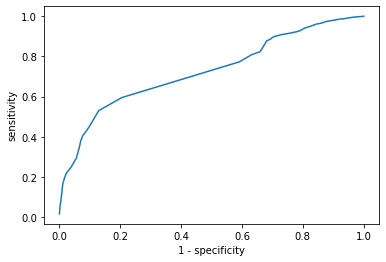

In [49]:
# plot ROC curve
plt.plot(1-val_specifity, val_sensitivity)
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')

In [50]:
temp = val_sensitivity + val_specifity - 1
cut_off_thresh[np.argmax(temp)]

0.47

In [51]:
from sklearn.metrics import roc_auc_score
roc_auc_score(class_host, prob_pred_train[:, 1])

0.7243239864353772

#### train sensitivity

In [52]:
train_pred = np.zeros([num_train, ])
train_pred[prob_pred_train[:,1] > 0.46] = 1

In [53]:
# compute recall (true positive / (true positive + false positive))
num_true_pos = np.sum(np.logical_and((train_pred==1), (class_host==1)))
num_false_pos = np.sum(np.logical_and((train_pred==1),(class_host==0)))
num_false_neg = np.sum(np.logical_and((train_pred==0),(class_host==1)))
num_true_neg = np.sum(np.logical_and((train_pred==0),(class_host==0)))

print('precision for hospitalization: ', num_true_pos/(num_true_pos + num_false_pos))
print('recall for hospitalization: ', num_true_pos/(num_true_pos + num_false_neg))
print(num_true_pos)
print(num_false_pos)
print(num_false_neg)
print(num_true_neg)

precision for hospitalization:  0.07582346410066618
recall for hospitalization:  0.5951343500363108
3278
39954
2230
154538


In [54]:
print('sensitivity for hospitalization: ', num_true_pos/(num_true_pos + num_false_neg))
print('specificity for hospitalization: ', num_true_neg/(num_true_neg + num_false_pos))

sensitivity for hospitalization:  0.5951343500363108
specificity for hospitalization:  0.7945725274047262


### prediction of test

In [55]:
X_test_symptom = np.zeros([num_test, num_symptom])
for i in range(num_test):
  t_symptom = np.zeros([num_symptom, ])
  t_symptom[test_symptoms[i].astype('int')] = 1
  X_test_symptom[i, :] = t_symptom

# convert to pca
z_test_symptom = spca.transform(X_test_symptom)


In [56]:
class_pred = lr.predict(z_test_symptom)
prob_pred = lr.predict_proba(z_test_symptom)
class_test = np.zeros([num_test, ])
class_test[test_num_hospitalized_day > 0] = 1

#### plot roc curve

In [57]:
# compute ROC curve
cut_off_thresh = np.array(range(0, 100))
cut_off_thresh.astype('float')
cut_off_thresh = cut_off_thresh / 100.0

val_sensitivity = np.zeros([100, ])
val_specifity = np.zeros([100, ])
# test
test_class = np.zeros([num_test, ])
test_class[test_num_hospitalized_day > 0] = 1

for i in range(100):
  temp_thresh = cut_off_thresh[i]
  temp_pred_class = np.zeros([num_test, ])
  temp_pred_class[prob_pred[:, 1] > cut_off_thresh[i]] = 1

  # compute recall (true positive / (true positive + false positive))
  num_true_pos = np.sum(np.logical_and((temp_pred_class==1), (test_class==1)))
  num_false_pos = np.sum(np.logical_and((temp_pred_class==1),(test_class==0)))
  num_false_neg = np.sum(np.logical_and((temp_pred_class==0),(test_class==1)))
  num_true_neg = np.sum(np.logical_and((temp_pred_class==0),(test_class==0)))

  val_sensitivity[i] = num_true_pos/(num_true_pos + num_false_neg)
  val_specifity[i] = num_true_neg/(num_true_neg + num_false_pos)

Text(0, 0.5, 'sensitivity')

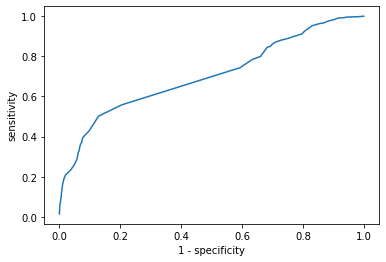

In [58]:
# plot ROC curve
plt.plot(1-val_specifity, val_sensitivity)
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')

In [59]:
temp = val_sensitivity + val_specifity - 1
cut_off_thresh[np.argmax(temp)]

0.47

In [60]:
from sklearn.metrics import roc_auc_score

In [61]:
roc_auc_score(test_class, prob_pred[:, 1])

0.7003034222046249

### prediction output

In [62]:
class_pred = np.zeros([num_test, ])
class_pred[prob_pred[:,1] > 0.46] = 1

In [63]:
# compute recall (true positive / (true positive + false positive))
num_true_pos = np.sum(np.logical_and((class_pred==1), (class_test==1)))
num_false_pos = np.sum(np.logical_and((class_pred==1),(class_test==0)))
num_false_neg = np.sum(np.logical_and((class_pred==0),(class_test==1)))
num_true_neg = np.sum(np.logical_and((class_pred==0),(class_test==0)))

print('precision for hospitalization: ', num_true_pos/(num_true_pos + num_false_pos))
print('recall for hospitalization: ', num_true_pos/(num_true_pos + num_false_neg))
print(num_true_pos)
print(num_false_pos)
print(num_false_neg)
print(num_true_neg)

precision for hospitalization:  0.07114664507640928
recall for hospitalization:  0.5583796664019063
703
9178
556
35471


In [64]:
print('sensitivity for hospitalization: ', num_true_pos/(num_true_pos + num_false_neg))
print('specificity for hospitalization: ', num_true_neg/(num_true_neg + num_false_pos))

sensitivity for hospitalization:  0.5583796664019063
specificity for hospitalization:  0.7944410849067168


# sparse naive bayes extract important features


https://arxiv.org/pdf/1905.09884.pdf

In [65]:
# generate index of hospitalized / nonhospitalized
# index - hospitalized
ind_1 = np.argwhere(train_num_hospitalized_day).reshape(-1)
# index - no hospitalization
ind_0 = np.argwhere(train_num_hospitalized_day == 0).reshape(-1)


In [66]:
# generate feature of hospitalization
# equation page 2, data setup 
func_1 = np.zeros([num_symptom, ])
func_0 = np.zeros([num_symptom, ])

for i in ind_0:
  func_0[train_symptoms[i].astype('int')] += 1

for i in ind_1:
  func_1[train_symptoms[i].astype('int')] += 1


In [67]:
# naive bayes, bernoulli
# page 4 equation (9) (10)
# include laplace smoothing
v = (func_0 + func_1) * np.log((func_0 + func_1 + 1)/(num_train + 2)) + (num_train - func_0 - func_1) * np.log(1 - (func_0 + func_1 + 1)/(num_train+2))
num_1 = ind_1.shape[0]
num_0 = ind_0.shape[0]
w_1 = func_1 * np.log((func_1+1) / (num_1+2)) + (num_1 - func_1) * np.log(1 - (func_1+1) / (num_1+2))
w_0 = func_0 * np.log((func_0+1) / (num_0+2)) + (num_0 - func_0) * np.log(1 - (func_0+1) / (num_0+2))
w = w_0 + w_1

det_wv = w - v

In [68]:
# find the num_symptom - main_symptom smallest index
k_symptoms = 10
# index of not important symptoms
ind_nk = np.argpartition(det_wv, num_symptom - k_symptoms)
ind_nk = ind_nk[:(num_symptom - k_symptoms)]
# index of important symptoms
ind_k = np.argpartition(-det_wv, k_symptoms)
ind_k = ind_k[:k_symptoms]

# weight of hospitalization - give hospitalized, the probability that a specific symptom exists in patient
theta_1 = np.zeros([num_symptom, ])
theta_1[ind_k] = (func_1[ind_k]+1) / (num_1+2)
theta_1[ind_nk] = (func_1[ind_nk] + func_0[ind_nk] + 1) / (num_train+2)

# weight of not hospitalization
theta_0 = np.zeros([num_symptom, ])
theta_0[ind_k] = (func_0[ind_k]+1) / (num_0+2)
theta_0[ind_nk] = (func_1[ind_nk] + func_0[ind_nk]+1) / (num_train+2)

In [69]:
# find the top 20 symptoms that leads to hospitalization
num_main_symptom = 20
# index of top weights
ind_m = np.argpartition(-np.abs(theta_0), num_main_symptom)
ind_m = ind_m[:num_main_symptom]

determinant_symptoms = []
for i in range(num_main_symptom):
  for symptom, ind_symptom in symptom_dict.items():
    if ind_symptom == ind_m[i]:
      # print(symptom)
      determinant_symptoms.append(symptom)
print(determinant_symptoms)

['Pain', 'Pyrexia', 'Chills', 'Fatigue', 'Headache', 'Nausea', 'Pruritus', 'Injection site erythema', 'Myalgia', 'Pain in extremity', 'Dizziness', 'Injection site pain', 'Arthralgia', 'Injection site swelling', 'Rash', 'Injection site pruritus', 'Dyspnoea', 'Vomiting', 'Erythema', 'Asthenia']


['Dyspnoea', 'Injection site pruritus', 'Erythema', 'Arthralgia', 'Vomiting', 'Chills', 'Injection site erythema', 'Injection site swelling', 'Myalgia', 'Nausea', 'Dizziness', 'Pyrexia', 'Fatigue', 'Pain in extremity', 'Pruritus', 'Rash', 'Asthenia', 'Headache', 'Pain', 'Injection site pain']


'Pain'
'Pyrexia'
'Chills'
'Fatigue'
'Headache'
'Nausea'
'Pruritus'
'Injection site erythema'
'Myalgia'
'Pain in extremity'
'Dizziness'
'Injection site pain'
'Arthralgia'
'Injection site swelling'
'Rash'
'Injection site pruritus'
'Dyspnoea'
'Vomiting'
'Erythema'
'Asthenia'

### prediction

#### train

In [70]:
pred_class = np.zeros([num_train, ])
pred_prob = np.zeros([num_train, ])  # probability of hospitalization
p_y1 = num_1 / num_train

for i in range(num_test):
  ind_1 = train_symptoms[i].astype('int')
  ind_0 = np.array(range(num_symptom))
  ind_0 = np.delete(ind_0, ind_1)
  py1 = np.exp(np.sum(np.log(theta_1[ind_1])) + np.sum(np.log(1 - theta_1[ind_0]))) * p_y1
  py0 = np.exp(np.sum(np.log(theta_0[ind_1])) + np.sum(np.log(1 - theta_0[ind_0]))) * (1 - p_y1)
  pred_prob[i] = py1/(py0+py1)

In [71]:
# test
train_class = np.zeros([num_train, ])
train_class[train_num_hospitalized_day > 0] = 1

In [72]:
# compute ROC curve
cut_off_thresh = np.array(range(0, 100))
cut_off_thresh.astype('float')
cut_off_thresh = cut_off_thresh / 100.0

val_sensitivity = np.zeros([100, ])
val_specifity = np.zeros([100, ])

for i in range(100):
  temp_thresh = cut_off_thresh[i]
  temp_pred_class = np.zeros([num_train, ])
  temp_pred_class[pred_prob > cut_off_thresh[i]] = 1

  # compute recall (true positive / (true positive + false positive))
  num_true_pos = np.sum(np.logical_and((temp_pred_class==1), (train_class==1)))
  num_false_pos = np.sum(np.logical_and((temp_pred_class==1),(train_class==0)))
  num_false_pos = np.sum(np.logical_and((temp_pred_class==1),(train_class==0)))
  num_false_neg = np.sum(np.logical_and((temp_pred_class==0),(train_class==1)))
  num_true_neg = np.sum(np.logical_and((temp_pred_class==0),(train_class==0)))

  val_sensitivity[i] = num_true_pos/(num_true_pos + num_false_neg)
  val_specifity[i] = num_true_neg/(num_true_neg + num_false_pos)

Text(0, 0.5, 'sensitivity')

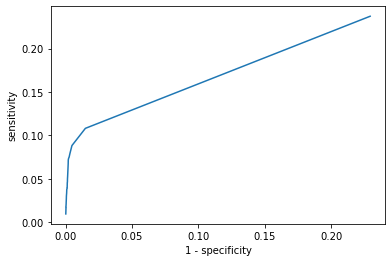

In [73]:
# plot ROC curve
plt.plot(1-val_specifity, val_sensitivity)
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')

In [74]:
temp = val_sensitivity + val_specifity - 1
cut_off_thresh[np.argmax(temp)]

0.02

In [75]:
from sklearn.metrics import roc_auc_score
roc_auc_score(train_class, pred_prob)

0.5148624864423447

In [76]:
pred_class = np.zeros([num_train, ])
p_y1 = num_1 / num_train

for i in range(num_test):
  ind_1 = train_symptoms[i].astype('int')
  ind_0 = np.array(range(num_symptom))
  ind_0 = np.delete(ind_0, ind_1)
  py1 = np.exp(np.sum(np.log(theta_1[ind_1])) + np.sum(np.log(1 - theta_1[ind_0]))) * p_y1
  py0 = np.exp(np.sum(np.log(theta_0[ind_1])) + np.sum(np.log(1 - theta_0[ind_0]))) * (1 - p_y1)
  
  if py1/(py0+py1) > 0.03:
    pred_class[i] = 1


In [77]:
# compute recall (true positive / (true positive + false positive))
num_true_pos = np.sum(np.logical_and((pred_class==1), (train_class==1)))
num_false_pos = np.sum(np.logical_and((pred_class==1),(train_class==0)))
num_false_neg = np.sum(np.logical_and((pred_class==0),(train_class==1)))
num_true_neg = np.sum(np.logical_and((pred_class==0),(train_class==0)))

print('precision for hospitalization: ', num_true_pos/(num_true_pos + num_false_pos))
print('recall for hospitalization: ', num_true_pos/(num_true_pos + num_false_neg))
print(num_true_pos)
print(num_false_pos)
print(num_false_neg)
print(num_true_neg)

precision for hospitalization:  0.1708225852679851
recall for hospitalization:  0.10820624546114742
596
2893
4912
191599


In [78]:
print('sensitivity for hospitalization: ', num_true_pos/(num_true_pos + num_false_neg))
print('specificity for hospitalization: ', num_true_neg/(num_true_neg + num_false_pos))

sensitivity for hospitalization:  0.10820624546114742
specificity for hospitalization:  0.9851253521995763


#### find best cut off

In [79]:
pred_class = np.zeros([num_test, ])
pred_prob = np.zeros([num_test, ])  # probability of hospitalization
p_y1 = num_1 / num_train

for i in range(num_test):
  ind_1 = test_symptoms[i].astype('int')
  ind_0 = np.array(range(num_symptom))
  ind_0 = np.delete(ind_0, ind_1)
  py1 = np.exp(np.sum(np.log(theta_1[ind_1])) + np.sum(np.log(1 - theta_1[ind_0]))) * p_y1
  py0 = np.exp(np.sum(np.log(theta_0[ind_1])) + np.sum(np.log(1 - theta_0[ind_0]))) * (1 - p_y1)
  pred_prob[i] = py1/(py0+py1)

In [80]:
# test
test_class = np.zeros([num_test, ])
test_class[test_num_hospitalized_day > 0] = 1

In [81]:
# compute ROC curve
cut_off_thresh = np.array(range(0, 100))
cut_off_thresh.astype('float')
cut_off_thresh = cut_off_thresh / 100.0

val_sensitivity = np.zeros([100, ])
val_specifity = np.zeros([100, ])

for i in range(100):
  temp_thresh = cut_off_thresh[i]
  temp_pred_class = np.zeros([num_test, ])
  temp_pred_class[pred_prob > cut_off_thresh[i]] = 1

  # compute recall (true positive / (true positive + false positive))
  num_true_pos = np.sum(np.logical_and((temp_pred_class==1), (test_class==1)))
  num_false_pos = np.sum(np.logical_and((temp_pred_class==1),(test_class==0)))
  num_false_neg = np.sum(np.logical_and((temp_pred_class==0),(test_class==1)))
  num_true_neg = np.sum(np.logical_and((temp_pred_class==0),(test_class==0)))

  val_sensitivity[i] = num_true_pos/(num_true_pos + num_false_neg)
  val_specifity[i] = num_true_neg/(num_true_neg + num_false_pos)




Text(0, 0.5, 'sensitivity')

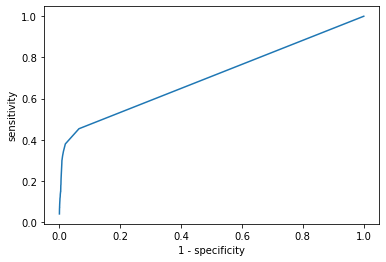

In [82]:
# plot ROC curve
plt.plot(1-val_specifity, val_sensitivity)
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')

In [83]:
temp = val_sensitivity + val_specifity - 1
cut_off_thresh[np.argmax(temp)]

0.02

#### inherent roc

In [84]:
from sklearn.metrics import roc_auc_score

In [85]:
roc_auc_score(test_class, pred_prob)

0.7255552180896794

#### result

In [86]:
pred_class = np.zeros([num_test, ])
p_y1 = num_1 / num_train

for i in range(num_test):
  ind_1 = test_symptoms[i].astype('int')
  ind_0 = np.array(range(num_symptom))
  ind_0 = np.delete(ind_0, ind_1)
  py1 = np.exp(np.sum(np.log(theta_1[ind_1])) + np.sum(np.log(1 - theta_1[ind_0]))) * p_y1
  py0 = np.exp(np.sum(np.log(theta_0[ind_1])) + np.sum(np.log(1 - theta_0[ind_0]))) * (1 - p_y1)
  
  if py1/(py0+py1) > 0.03:
    pred_class[i] = 1

# test
test_class = np.zeros([num_test, ])
test_class[test_num_hospitalized_day > 0] = 1



In [87]:
# compute recall (true positive / (true positive + false positive))
num_true_pos = np.sum(np.logical_and((pred_class==1), (test_class==1)))
num_false_pos = np.sum(np.logical_and((pred_class==1),(test_class==0)))
num_false_neg = np.sum(np.logical_and((pred_class==0),(test_class==1)))
num_true_neg = np.sum(np.logical_and((pred_class==0),(test_class==0)))

print('precision for hospitalization: ', num_true_pos/(num_true_pos + num_false_pos))
print('recall for hospitalization: ', num_true_pos/(num_true_pos + num_false_neg))
print(num_true_pos)
print(num_false_pos)
print(num_false_neg)
print(num_true_neg)

precision for hospitalization:  0.16493356441363374
recall for hospitalization:  0.45353455123113584
571
2891
688
41758


In [88]:
print('sensitivity for hospitalization: ', num_true_pos/(num_true_pos + num_false_neg))
print('specificity for hospitalization: ', num_true_neg/(num_true_neg + num_false_pos))

sensitivity for hospitalization:  0.45353455123113584
specificity for hospitalization:  0.9352505095298886
